## Lavori_Attivati_Cessati_Prediction

This analysis want to underline how the pandemic period change the world of work in Lombardia region.

We used two different dataSet taken from Lombardia official  web_Site:
- **Rapporti_di_lavoro_attivati.csv**.
- **Rapporti_di_lavoro_cessati.csv**

The analysis is divided into five part:
1. The first is focus on the "Rapporti_di_lavoro_attivati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


2. The second is focus on the "Rapporti_di_lavoro_cessati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


3. The third is focus on the comparison of the first and the second analysis.


4. The fourth analyzes the time series behaviour of 'Rapporti_di_lavoro_attivati' dataset.


5. The fifth  analyzes the time series behaviour of 'Rapporti_di_lavoro_cessati' dataset.

6. The sixth is focus  on the prediction through ARIMA_MODEL of Rapporti_Attivati dataSet

7. The seventh is focus  on the prediction through ARIMA_MODEL of Rapporti_Cessati dataSet

______

**Import the library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import sklearn
import statsmodels.api as sm
import warnings

from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from pylab import rcParams
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

%matplotlib inline

plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

______

### __FIRST PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [2]:
## We will display DF head and tail
df_Rapporti_Attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_Rapporti_Attivati.head(5)

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [3]:
## We will see the number of rows and columns of the dataset
row = df_Rapporti_Attivati.shape[0]
column = df_Rapporti_Attivati.shape[1]
print(f'Rows: {row}')
print(f'Column: {column}')

Rows: 9579794
Column: 9


In [4]:
## We will see the values type of the columns
df_Rapporti_Attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


______

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. Description in a single column

In [5]:
df_Rapporti_Attivati.ETA.describe().round(2)

count    9579794.00
mean          35.30
std           11.78
min            0.00
25%           25.00
50%           34.00
75%           44.00
max          221.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

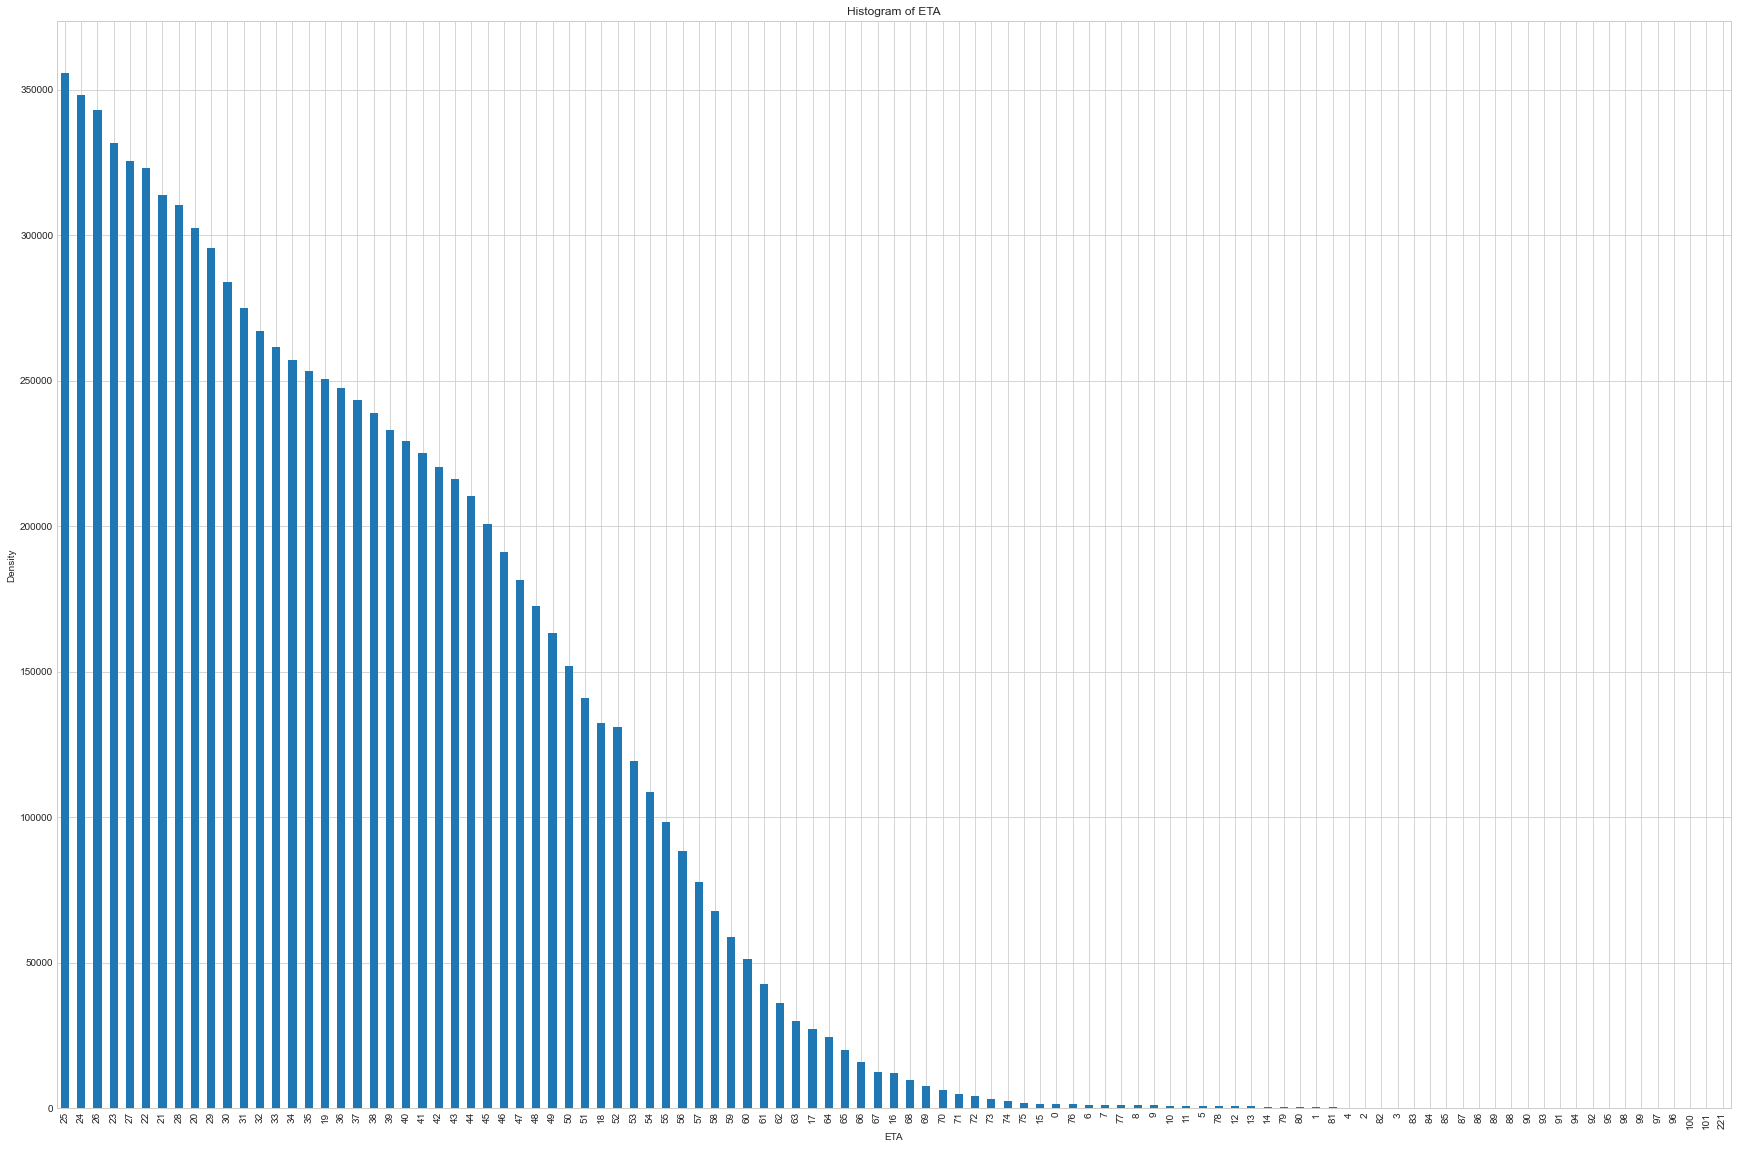

In [6]:
df_Rapporti_Attivati['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

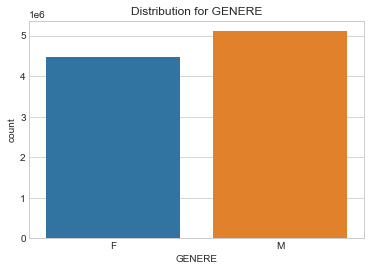

In [7]:
sns.countplot(x='GENERE', data=df_Rapporti_Attivati)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             4765803
BRESCIA            1167053
BERGAMO             806702
VARESE              548804
MONZA E BRIANZA     487469
COMO                381673
MANTOVA             357928
PAVIA               319569
CREMONA             241723
LECCO               203317
SONDRIO             161758
LODI                137995
Name: PROVINCIAIMPRESA, dtype: int64


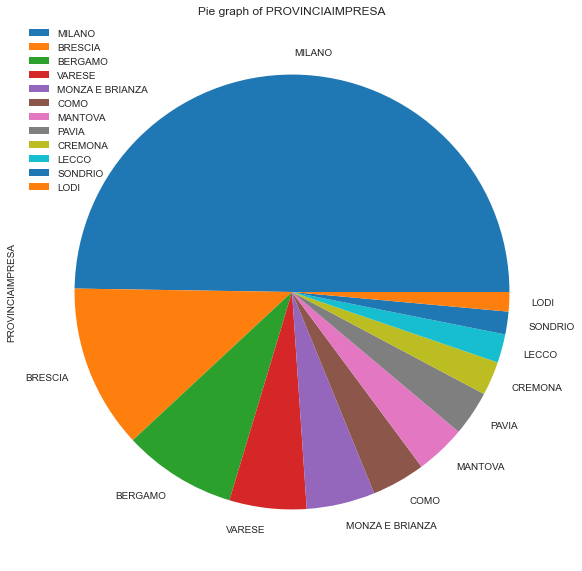

In [8]:
df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

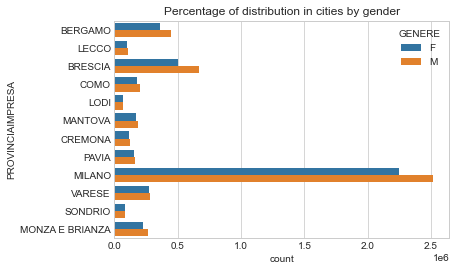

In [9]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=df_Rapporti_Attivati)
plt.title('Percentage of distribution in cities by gender')

______

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [10]:
dropAge = df_Rapporti_Attivati[(df_Rapporti_Attivati['ETA'] >= 70) | (df_Rapporti_Attivati['ETA'] <= 17)].index

In [11]:
df_Rapporti_Attivati.drop(dropAge, inplace=True)

2. __Elimination of all null values.__

In [12]:
col = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in col:
    df_Rapporti_Attivati.loc[df_Rapporti_Attivati[column] == '?', column] = np.nan

df_Rapporti_Attivati.dropna(axis = 0, inplace = True) 

______

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global business contract.__
2. __Before-Covid business contract.__
3. __During-Covid business contract.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [13]:
data=df_Rapporti_Attivati['DATA']

In [14]:
year=[]
mounth=[]
day=[]
data_Complete=[]
for i in data:
    data1=datetime.strptime(i, "%d/%m/%Y")
    year.append(data1.year)
    mounth.append(data1.month)
    day.append(data1.day)
    data_Complete.append(data1)

In [15]:
df_Rapporti_Attivati.drop(['DATA'], axis=1, inplace=True)

In [16]:
df_Rapporti_Attivati['DATA'] = data_Complete
df_Rapporti_Attivati['YEAR'] = year
df_Rapporti_Attivati['MOUNTH'] = mounth
df_Rapporti_Attivati['DAY'] = day

In [17]:
df_Rapporti_Attivati.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MOUNTH,DAY
0,F,60.0,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020-05-09,2020,5,9
1,M,43.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019-07-12,2019,7,12
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2013-06-05,2013,6,5
3,F,28.0,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,2010-03-12,2010,3,12
4,F,49.0,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,2021-04-06,2021,4,6


______

1. __Global Data Analysis__

In [18]:
global_Data_YEAR = df_Rapporti_Attivati.groupby(['YEAR']).MOUNTH.count()

In [19]:
global_Data_MOUNTH = df_Rapporti_Attivati.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

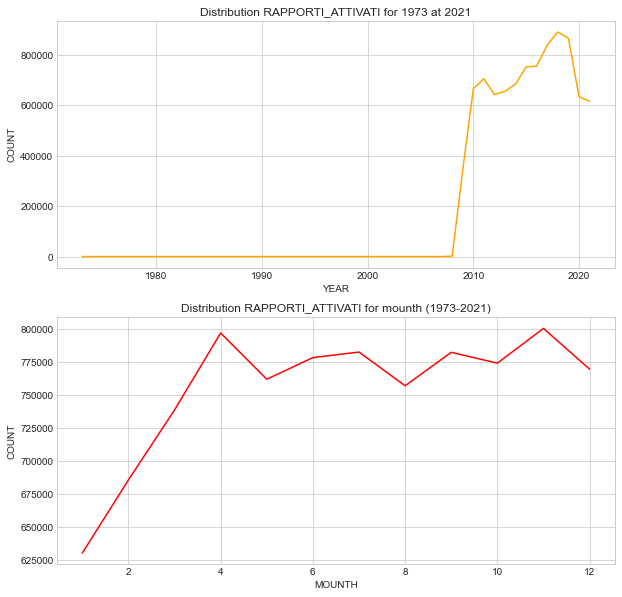

In [20]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataY = global_Data_YEAR.index
y_dataY = global_Data_YEAR.values

x_dataM = global_Data_MOUNTH.index
y_dataM = global_Data_MOUNTH.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY, y_dataY, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM, y_dataM, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth (1973-2021)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [21]:
data_global_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'M')]
data_global_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'F')]

In [22]:
global_Data_YEAR_M = data_global_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_F = data_global_F.groupby(['MOUNTH']).GENERE.count()

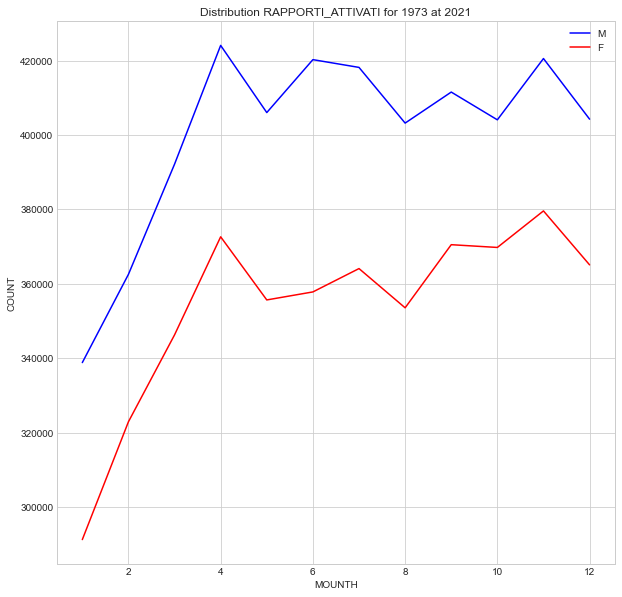

In [23]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_M = global_Data_YEAR_M.index
y_dataY_M = global_Data_YEAR_M.values

x_dataY_F = global_Data_YEAR_F.index
y_dataY_F = global_Data_YEAR_F.values


ax.plot(x_dataY_M, y_dataY_M, color='blue', label='M')
ax.plot(x_dataY_F, y_dataY_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [24]:
data_Before_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019)]

In [25]:
global_Data_YEAR_Before_Covid = data_Before_Covid.groupby(['YEAR']).MOUNTH.count()

In [26]:
global_Data_MOUNTH_Before_Covid = data_Before_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

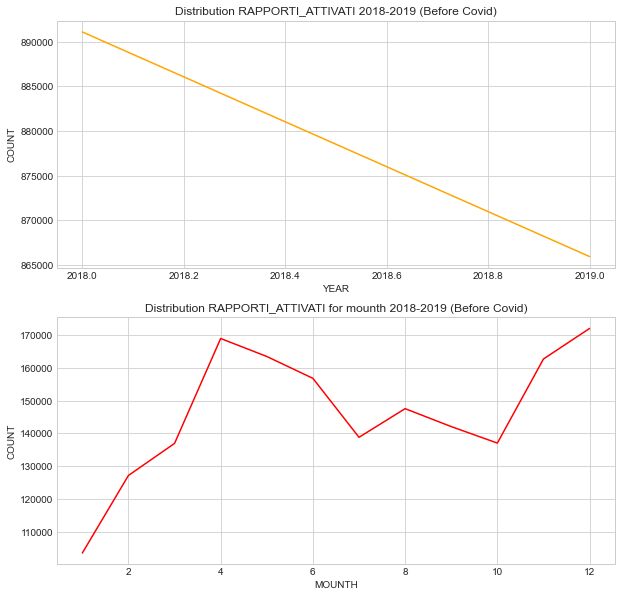

In [27]:
figure = plt.figure(figsize=(10, 10))

x_dataY_BC = global_Data_YEAR_Before_Covid.index
y_dataY_BC = global_Data_YEAR_Before_Covid.values

x_dataM_BC = global_Data_MOUNTH_Before_Covid.index
y_dataM_BC = global_Data_MOUNTH_Before_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BC, y_dataY_BC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BC, y_dataM_BC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [28]:
data_Before_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]

data_Before_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [29]:
global_Data_YEAR_before_Covid_M = data_Before_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_before_Covid_F = data_Before_Covid_F.groupby(['MOUNTH']).GENERE.count()

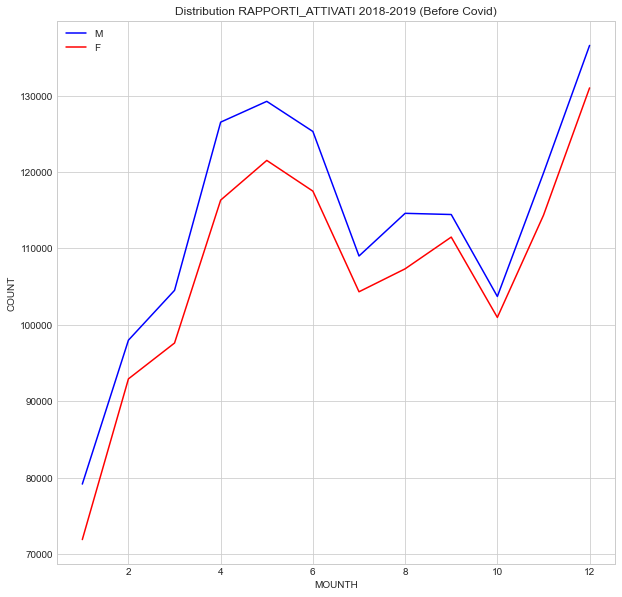

In [30]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_M = global_Data_YEAR_before_Covid_M.index
y_dataY_BC_M = global_Data_YEAR_before_Covid_M.values

x_dataY_BC_F = global_Data_YEAR_before_Covid_F.index
y_dataY_BC_F = global_Data_YEAR_before_Covid_F.values


ax.plot(x_dataY_BC_M, y_dataY_BC_M, color='blue', label='M')
ax.plot(x_dataY_BC_F, y_dataY_BC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis during covid__

In [31]:
data_during_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019)]

In [32]:
global_Data_YEAR_during_Covid = data_during_Covid.groupby(['YEAR']).MOUNTH.count()

In [33]:
global_Data_MOUNTH_during_Covid = data_during_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

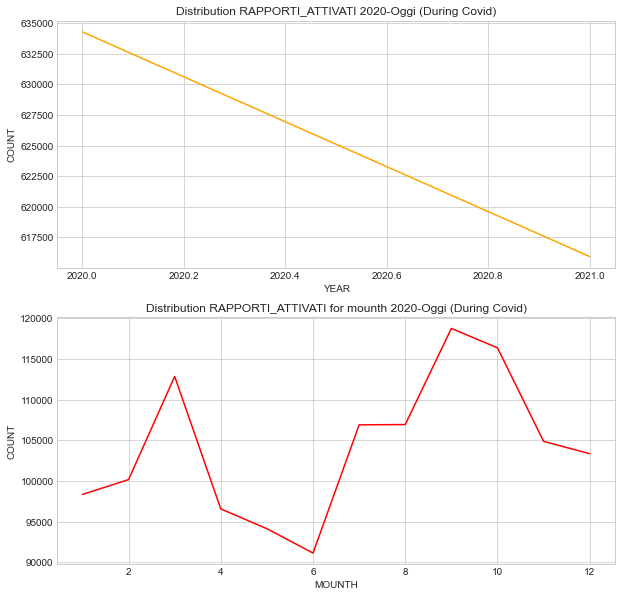

In [34]:
figure = plt.figure(figsize=(10, 10))

x_dataY_DC = global_Data_YEAR_during_Covid.index
y_dataY_DC = global_Data_YEAR_during_Covid.values

x_dataM_DC = global_Data_MOUNTH_during_Covid.index
y_dataM_DC = global_Data_MOUNTH_during_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DC, y_dataY_DC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DC, y_dataM_DC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [35]:
data_during_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]
data_during_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [36]:
global_Data_YEAR_during_Covid_M = data_during_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_during_Covid_F = data_during_Covid_F.groupby(['MOUNTH']).GENERE.count()

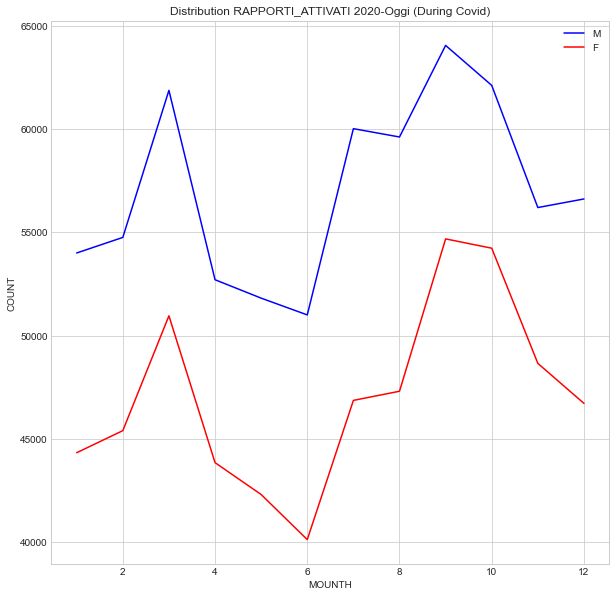

In [37]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_M = global_Data_YEAR_during_Covid_M.index
y_dataY_DC_M = global_Data_YEAR_during_Covid_M.values

x_dataY_DC_F = global_Data_YEAR_during_Covid_F.index
y_dataY_DC_F = global_Data_YEAR_during_Covid_F.values


ax.plot(x_dataY_DC_M, y_dataY_DC_M, color='blue', label='M')
ax.plot(x_dataY_DC_F, y_dataY_DC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

______

### __SECOND PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [38]:
Rapporti_Lavoro_Cessati_DF = pd.read_csv('Rapporti_di_lavoro_cessati.csv')

In [39]:
Rapporti_Lavoro_Cessati_DF.head(5)

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [40]:
## We will see the number of rows and columns of the dataset
row = Rapporti_Lavoro_Cessati_DF.shape[0]
column = Rapporti_Lavoro_Cessati_DF.shape[1]
print(f'Rows {row}')
print(f'Column {column}')

Rows 3741394
Column 9


In [41]:
## We will see the values type of the columns
Rapporti_Lavoro_Cessati_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


______

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [42]:
Rapporti_Lavoro_Cessati_DF['ETA'].describe().round(2)

count    3741394.00
mean          38.11
std           12.62
min            0.00
25%           28.00
50%           37.00
75%           47.00
max          621.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

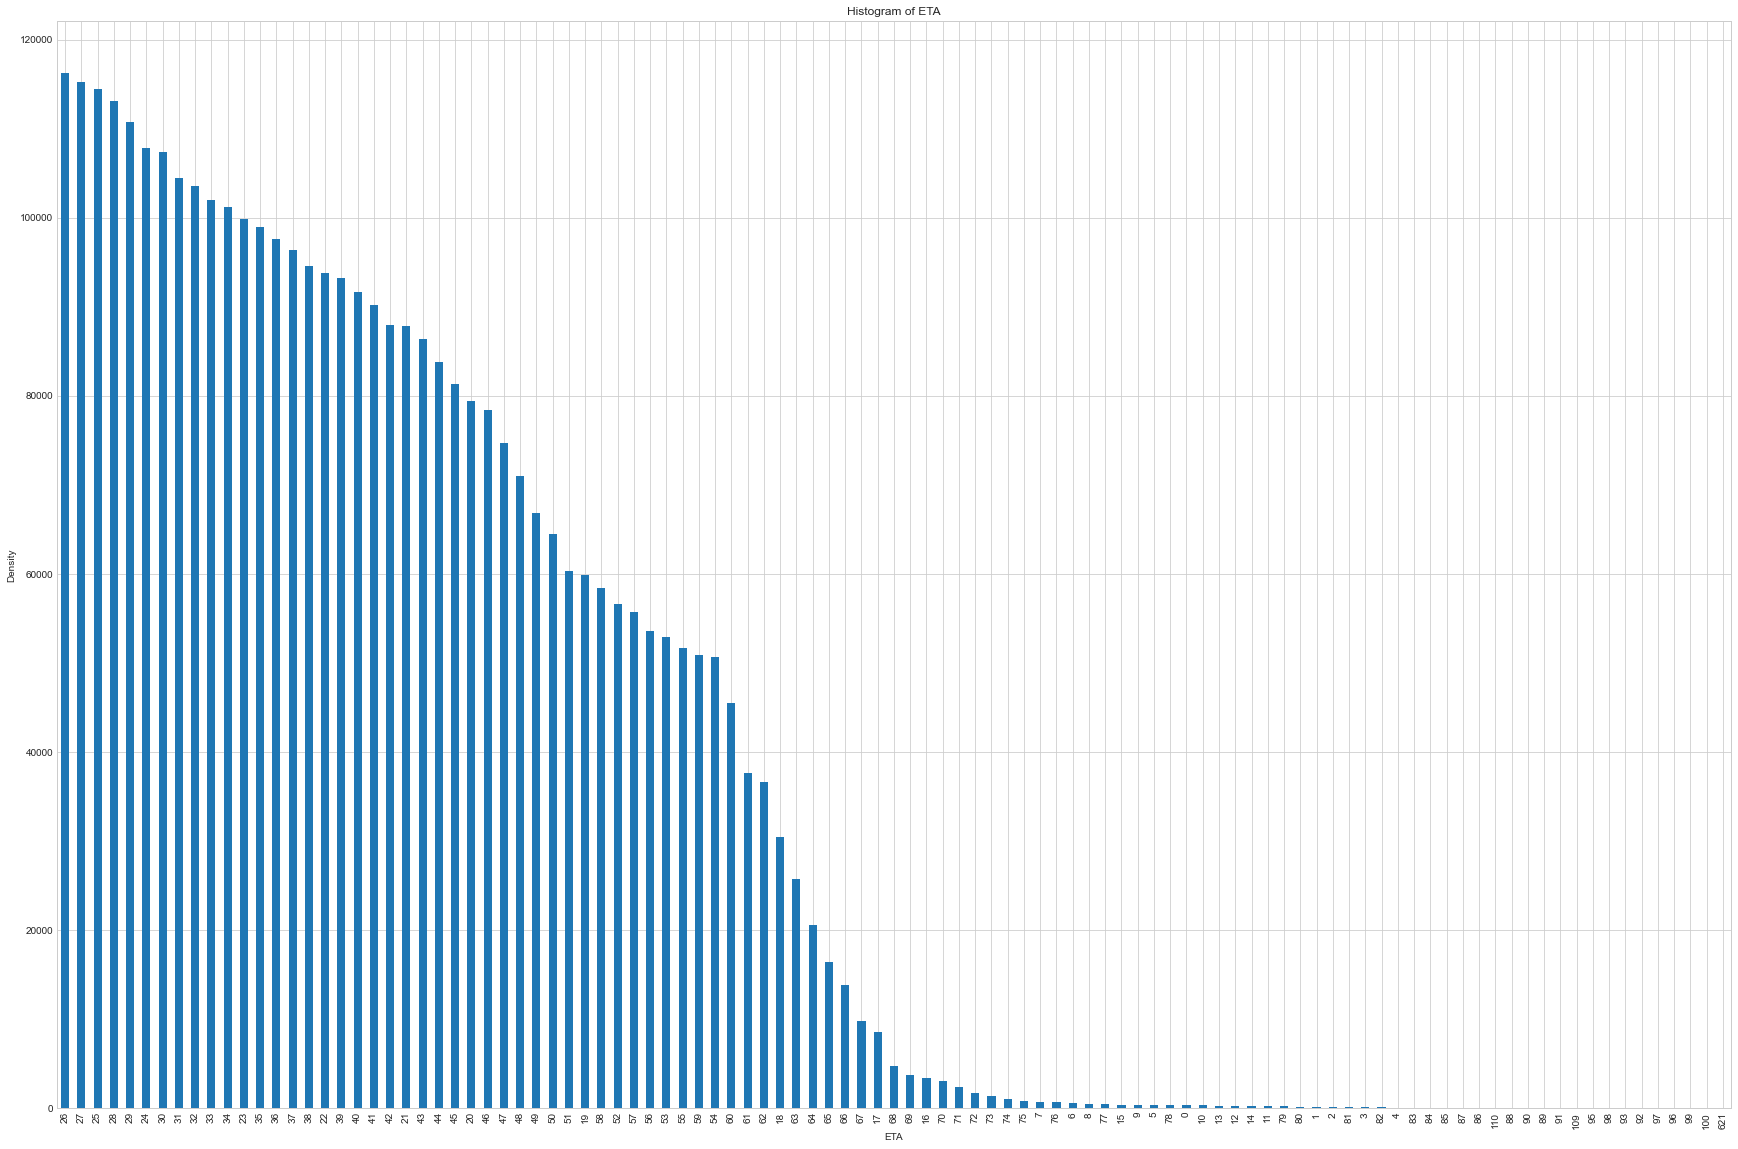

In [43]:
Rapporti_Lavoro_Cessati_DF['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

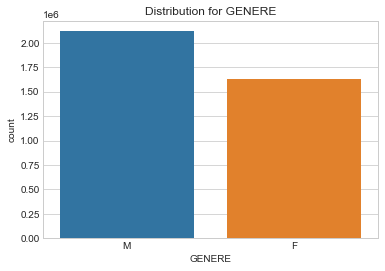

In [44]:
sns.countplot(x='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             1658400
BRESCIA             454133
BERGAMO             356196
MONZA E BRIANZA     248667
VARESE              239937
COMO                182745
PAVIA               147646
MANTOVA             142542
CREMONA              95434
LECCO                87255
LODI                 66423
SONDRIO              62016
Name: PROVINCIAIMPRESA, dtype: int64


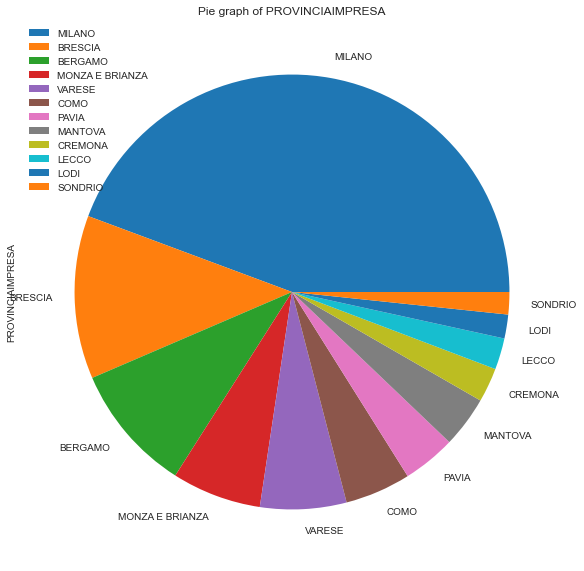

In [45]:
Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

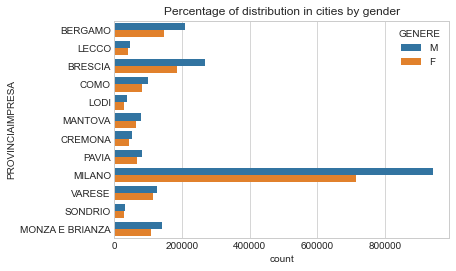

In [46]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Percentage of distribution in cities by gender')

______

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [47]:
dropAgeC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['ETA'] >= 70) | (Rapporti_Lavoro_Cessati_DF['ETA'] <= 17)].index

In [48]:
Rapporti_Lavoro_Cessati_DF.drop(dropAgeC, inplace=True)

2. __Elimination of all null values.__

In [49]:
colC = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in colC:
    Rapporti_Lavoro_Cessati_DF.loc[Rapporti_Lavoro_Cessati_DF[column] == '?', column] = np.nan

Rapporti_Lavoro_Cessati_DF.dropna(axis = 0, inplace = True)

______

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global Data Analysis.__
2. __Data Analysis Before covid.__
3. __Data Analysis During covid.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [50]:
dataC=Rapporti_Lavoro_Cessati_DF['DATA']

In [51]:
yearC=[]
monthC=[]
dayC=[]
data_CompleteC=[]
for i in dataC:
    data1C=datetime.strptime(i, "%d/%m/%Y")
    yearC.append(data1C.year)
    monthC.append(data1C.month)
    dayC.append(data1C.day)
    data_CompleteC.append(data1C)

In [52]:
Rapporti_Lavoro_Cessati_DF.drop(['DATA'], axis=1, inplace=True)

In [53]:
Rapporti_Lavoro_Cessati_DF['DATA'] = data_CompleteC
Rapporti_Lavoro_Cessati_DF['YEAR'] = yearC
Rapporti_Lavoro_Cessati_DF['MONTH'] = monthC
Rapporti_Lavoro_Cessati_DF['DAY'] = dayC

In [54]:
Rapporti_Lavoro_Cessati_DF.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,M,20.0,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2019-04-02,2019,4,2
1,F,28.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2018-06-08,2018,6,8
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2016-02-02,2016,2,2
3,M,59.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2015-01-12,2015,1,12
4,M,61.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2017-08-09,2017,8,9


______

1. __Global Data Analysis__

In [55]:
global_Data_YEARC = Rapporti_Lavoro_Cessati_DF.groupby(['YEAR']).MONTH.count()

In [56]:
global_Data_MONTHC = Rapporti_Lavoro_Cessati_DF.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

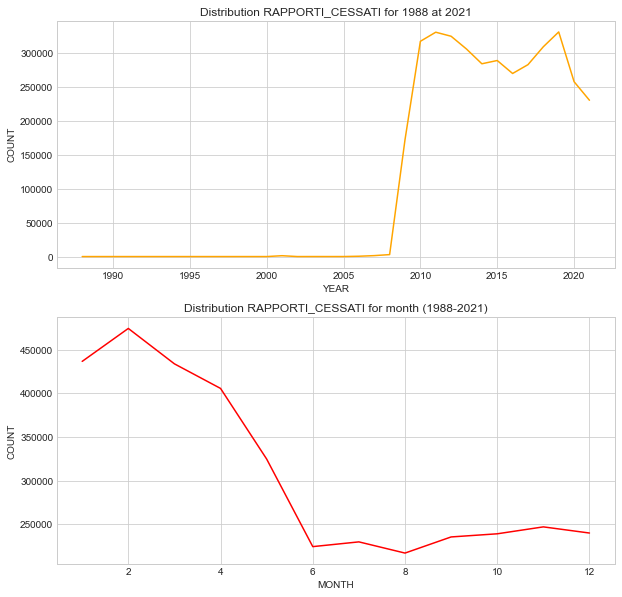

In [57]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataYC = global_Data_YEARC.index
y_dataYC = global_Data_YEARC.values

x_dataMC = global_Data_MONTHC.index
y_dataMC = global_Data_MONTHC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataYC, y_dataYC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI for 1988 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataMC, y_dataMC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month (1988-2021)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [58]:
data_global_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_global_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [59]:
global_Data_YEAR_MC = data_global_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_FC = data_global_FC.groupby(['MONTH']).GENERE.count()

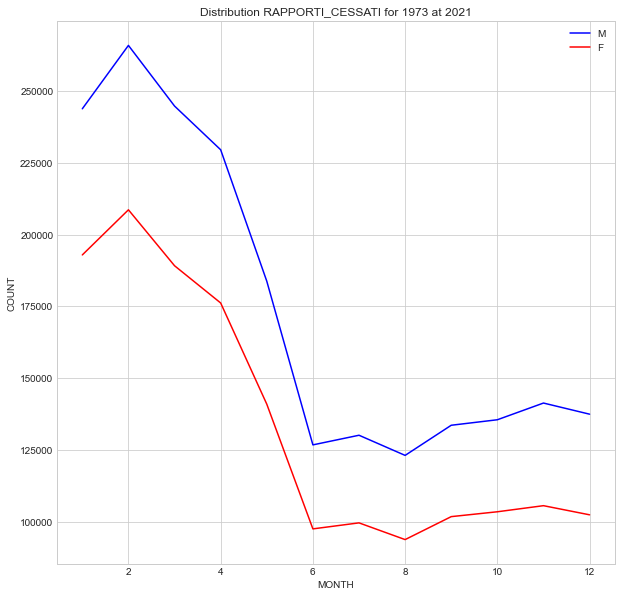

In [60]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_MC = global_Data_YEAR_MC.index
y_dataY_MC = global_Data_YEAR_MC.values

x_dataY_FC = global_Data_YEAR_FC.index
y_dataY_FC = global_Data_YEAR_FC.values


ax.plot(x_dataY_MC, y_dataY_MC, color='blue', label='M')
ax.plot(x_dataY_FC, y_dataY_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI for 1973 at 2021')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

______

2. __Data Analysis Before covid__

In [61]:
data_Before_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019)]

In [62]:
global_Data_YEAR_Before_CovidC = data_Before_CovidC.groupby(['YEAR']).MONTH.count()

In [63]:
global_Data_MONTH_Before_CovidC = data_Before_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

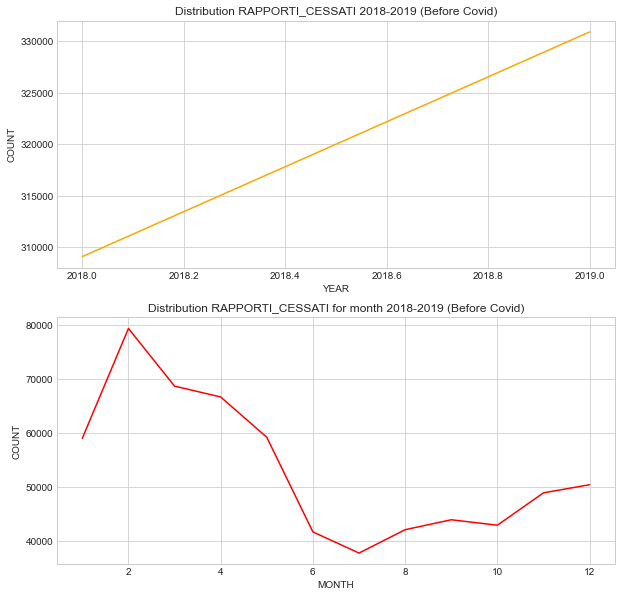

In [64]:
figure = plt.figure(figsize=(10, 10))

x_dataY_BCC = global_Data_YEAR_Before_CovidC.index
y_dataY_BCC = global_Data_YEAR_Before_CovidC.values

x_dataM_BCC = global_Data_MONTH_Before_CovidC.index
y_dataM_BCC = global_Data_MONTH_Before_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BCC, y_dataY_BCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BCC, y_dataM_BCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [65]:
data_Before_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]

data_Before_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [66]:
global_Data_YEAR_before_Covid_MC = data_Before_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_before_Covid_FC = data_Before_Covid_FC.groupby(['MONTH']).GENERE.count()

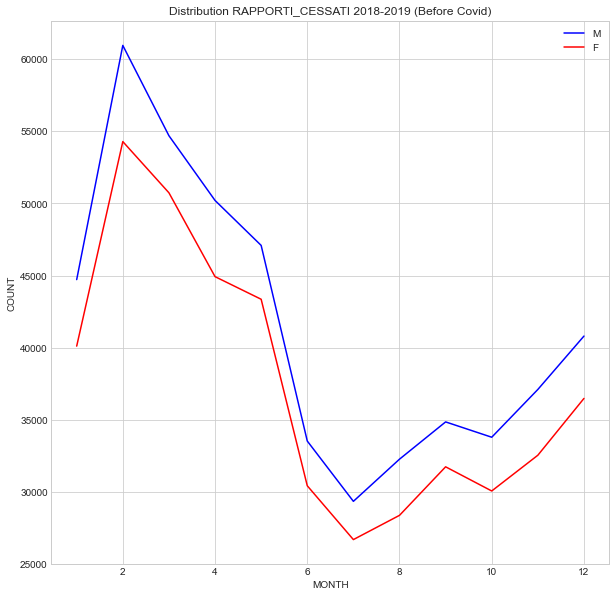

In [67]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.index
y_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.values

x_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.index
y_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.values


ax.plot(x_dataY_BC_MC, y_dataY_BC_MC, color='blue', label='M')
ax.plot(x_dataY_BC_FC, y_dataY_BC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

In [68]:
data_during_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019)]

In [69]:
global_Data_YEAR_during_CovidC = data_during_CovidC.groupby(['YEAR']).MONTH.count()

In [70]:
global_Data_MONTH_during_CovidC = data_during_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

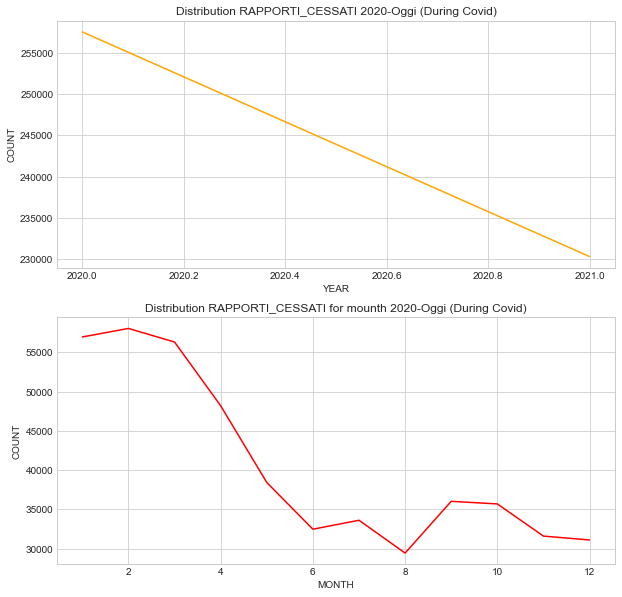

In [71]:
figure = plt.figure(figsize=(10, 10))

x_dataY_DCC = global_Data_YEAR_during_CovidC.index
y_dataY_DCC = global_Data_YEAR_during_CovidC.values

x_dataM_DCC = global_Data_MONTH_during_CovidC.index
y_dataM_DCC = global_Data_MONTH_during_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DCC, y_dataY_DCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DCC, y_dataM_DCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [72]:
data_during_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_during_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [73]:
global_Data_YEAR_during_Covid_MC = data_during_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_during_Covid_FC = data_during_Covid_FC.groupby(['MONTH']).GENERE.count()

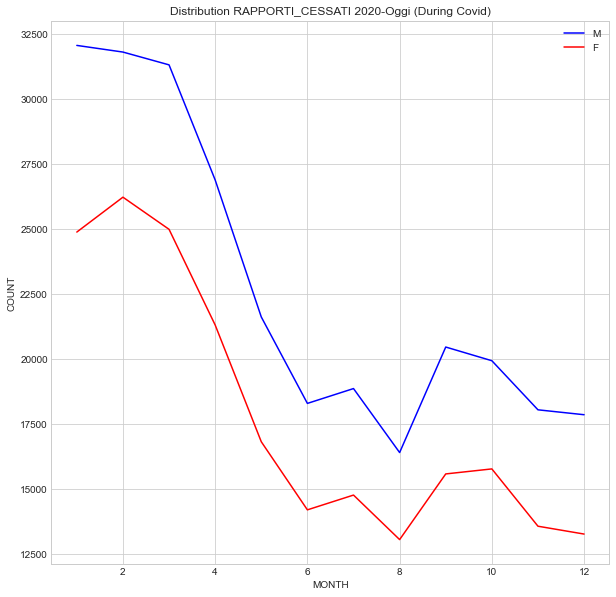

In [74]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.index
y_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.values

x_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.index
y_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.values


ax.plot(x_dataY_DC_MC, y_dataY_DC_MC, color='blue', label='M')
ax.plot(x_dataY_DC_FC, y_dataY_DC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

______

### __THIRD PART__

The last part of the analysis rappresents a comparison of the different results obtained from the previous data sets analysis. The comparision focus on:
1. __The global analysis__.
2. __The global analysis by gender (Male, Female).__
3. __The analysis before covid19 pandemic.__
4. __The analysis before covid19 pandemic by gender (Male, Female).__
5. __The analysis during covid19 pandemic.__
6. __The analysis during covid19 pandemic by gender (Male, Female).__

1. __The global analysis__

This first global analysis is focused on the distribution of active and inactive business contract:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.


- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.


<img src="Graph Analysis/Global dataAnalysis RapportiAttivati_cessati.png">

2. __The global analysis by gender (Male, Female).__

This comparison rappresents the distribution of active and inactive business conctract by gender:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender

<img src="Graph Analysis/Global dataAnalysis  for gender Rapporti_Attivati_Cessati.png">

3. __The analysis before covid19 pandemic.__

This analysis is focused on the distribution of active and inactive business contract before covid19 pandemic:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.


- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.

<img src="Graph Analysis/Data Analysis before covid Rapporti_Attivati_Cessati.png">

4. __The analysis before covid19 pandemic by gender (Male, Female).__

This comparison rappresents the distribution of active and inactive business conctract by gender before covid19 pandemic:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender


<img src="Graph Analysis/Data Analysis before covid for gender Rapporti_Attivati_Cessati.png">

5. __The analysis during covid19 pandemic.__

This analysis is focused on the distribution of active and inactive business contract during covid19 pandemic:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.

- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.



<img src="Graph Analysis/Data Analysis during covid Rapporti_Attivati_Cessati.png">

6. __The analysis during covid19 pandemic by gender (Male, Female)__

This comparison rappresents the distribution of active and inactive business conctract by gender during covid19 pandemic:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender

<img src="Graph Analysis/Data Analysis during covid for gender Rapporti_Attivati_Cessati.png">

______

## __Fourth part__ 
### __Time Series analysis__

Previously, we have analyzed 'Rapporti_di_lavoro_Attivati' dataSet in terms of:
- __Globally__
- __Before Covid 19 pandemic__
- __During Covid 19 pandemic__

In the following paragraphs, we are going to view the trend of these time series. This analysis want to outlines:
__Global Analysis__


In particular:
1. __View of boxPlot of month-wise(seasonal) ans year-wise(Trend)__
2. __View of Additive and Multiplicative Patterns__
3. __Stationarity test__

This chapter describes the Time Series of the global dataset analyzed before. In particular we have created two new subset between 2009 and 2021 year in order to clean the Time Series from null data.

In [75]:
global_Data_YEAR_Copy = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR']>2008)]
global_Data_YEAR_1 = global_Data_YEAR_Copy.groupby(['DATA']).YEAR.count()
global_Data_YEAR_2 = global_Data_YEAR_Copy.groupby(['YEAR']).MOUNTH.count()

global_Data_YEAR_1 = pd.DataFrame({'date': global_Data_YEAR_1.index,
                                 'value': global_Data_YEAR_1.values})

global_Data_YEAR_2 = pd.DataFrame({'date': global_Data_YEAR_2.index,
                                 'value': global_Data_YEAR_2.values})

global_Data_YEAR_1['year'] = [d.year for d in global_Data_YEAR_1.date]
global_Data_YEAR_1['month'] = [d.strftime('%b') for d in global_Data_YEAR_1.date]
years = global_Data_YEAR_1['year'].unique()

1. __BoxPlot of Month-wise(Seasonal) and Year-wise(trend)__

We have group the data at seasonal intervals in order to see how the values are distributed in year and month and how it compares over time.

- The first box plot represent the trend over the years --> Trend
- The second box plot represent the  trend in the various month for all years --> Seasonality

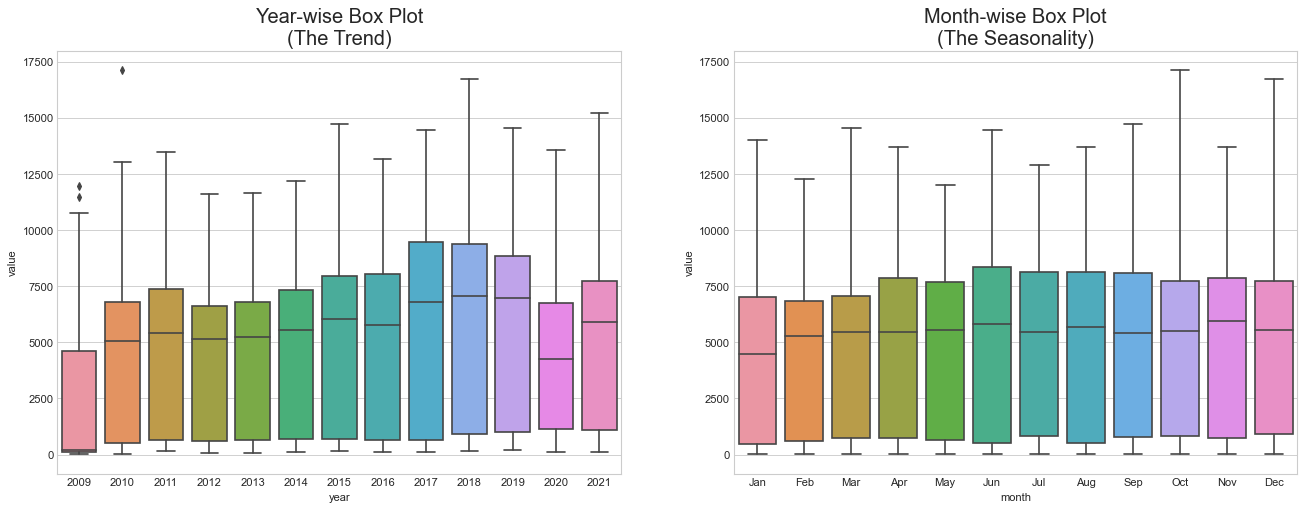

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_YEAR_1, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_YEAR_1, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

2. __Additive and moltiplicative patterns__

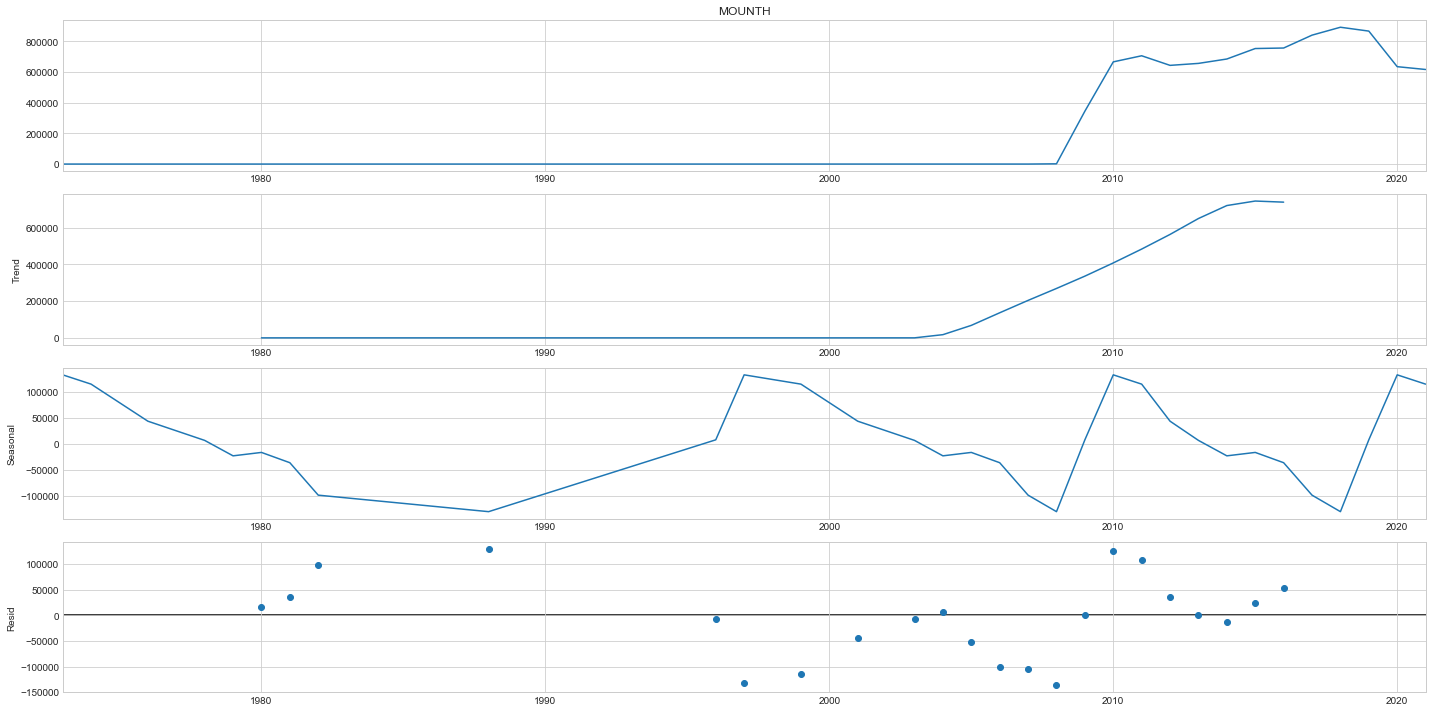

In [77]:
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(global_Data_YEAR, model="additive",period=10)
add = decomposed_add.plot()
plt.show()

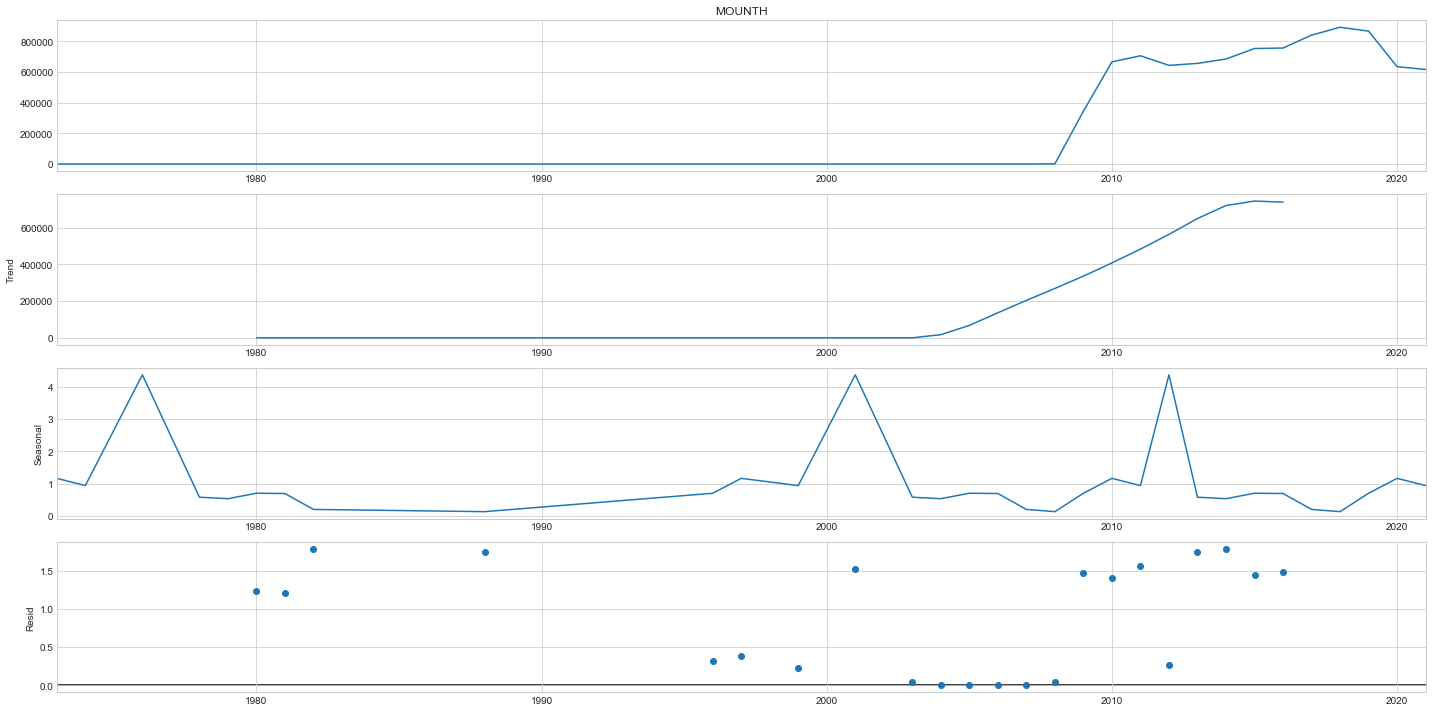

In [78]:
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(global_Data_YEAR, model="multiplicative",period=10)
add = decomposed_add.plot()
plt.show()

3. __Stationarity test__

This analysis want to test if our Time Series has constant statistical properties over time. 

In [79]:
results = adfuller(global_Data_YEAR.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -0.405440
p-value: 0.909186


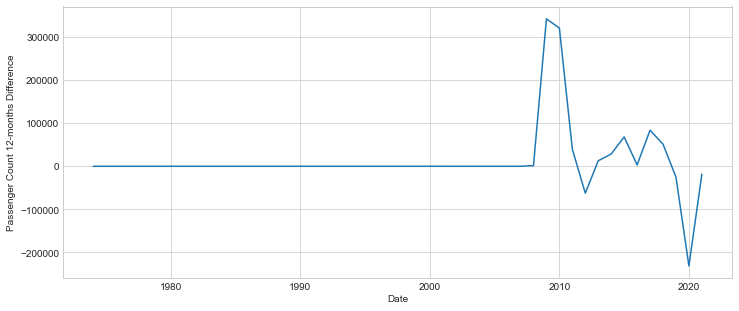

In [80]:
global_diff = global_Data_YEAR.diff().dropna()
plt.figure(figsize=(12,5))
ax1 = global_diff.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Passenger Count 12-months Difference")
plt.grid(True)
plt.show()

In [81]:
results = adfuller(global_diff.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -4.174841
p-value: 0.000727


### __Feature Engineering__

After manipulating data, cleaning null/ambiguous data and having a view of time series behaviour, now we are going to manipulated data in order to transform and adapt them to create the automatic learning model.   

This process is called Feature Engineering; it is important for the Machine Learning because some type of automatic learning don't support  token/String data but only number

Our goal is to identify in the dataSet the token/String data in order to transform them in to number type.

In [82]:
result_String = df_Rapporti_Attivati.select_dtypes(include=['object', 'category'])

In [83]:
result_String.head(5)

,GENERE,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,F,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,F,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,F,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,F,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


### __Label encoder__

We used LabelEncoder to convert each class under specified feature to a numerical value.

In [84]:
df_copy = df_Rapporti_Attivati.copy()

In [85]:
class_Genere = preprocessing.LabelEncoder()
class_Genere.fit(df_copy['GENERE'])
df_copy['GENERE'] = class_Genere.transform(df_copy['GENERE'])

class_SettoreEconomico = preprocessing.LabelEncoder()
class_SettoreEconomico.fit(df_copy['SETTOREECONOMICODETTAGLIO'])
df_copy['SETTOREECONOMICODETTAGLIO'] = class_SettoreEconomico.transform(df_copy['SETTOREECONOMICODETTAGLIO'])

class_TitoloStudio = preprocessing.LabelEncoder()
class_TitoloStudio.fit(df_copy['TITOLOSTUDIO'])
df_copy['TITOLOSTUDIO'] = class_TitoloStudio.transform(df_copy['TITOLOSTUDIO'])

class_Contratto = preprocessing.LabelEncoder()
class_Contratto.fit(df_copy['CONTRATTO'])
df_copy['CONTRATTO'] = class_Contratto.transform(df_copy['CONTRATTO'])

class_ModalitaLavoro = preprocessing.LabelEncoder()
class_ModalitaLavoro.fit(df_copy['MODALITALAVORO'])
df_copy['MODALITALAVORO'] = class_ModalitaLavoro.transform(df_copy['MODALITALAVORO'])

class_Provincia = preprocessing.LabelEncoder()
class_Provincia.fit(df_copy['PROVINCIAIMPRESA'])
df_copy['PROVINCIAIMPRESA'] = class_Provincia.transform(df_copy['PROVINCIAIMPRESA'])

class_Italiano = preprocessing.LabelEncoder()
class_Italiano.fit(df_copy['ITALIANO'])
df_copy['ITALIANO'] = class_Italiano.transform(df_copy['ITALIANO'])

df_copy.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MOUNTH,DAY
0,0,60.0,188,8,31,4,0,188,2020-05-09,2020,5,9
1,1,43.0,830,6,24,4,0,89,2019-07-12,2019,7,12
2,0,20.0,542,6,7,4,0,89,2013-06-05,2013,6,5
3,0,28.0,62,0,39,0,0,89,2010-03-12,2010,3,12
4,0,49.0,1073,6,37,0,0,89,2021-04-06,2021,4,6


In [86]:
df_copy.dtypes

GENERE                                int32
ETA                                 float64
SETTOREECONOMICODETTAGLIO             int32
TITOLOSTUDIO                          int32
CONTRATTO                             int32
MODALITALAVORO                        int32
PROVINCIAIMPRESA                      int32
ITALIANO                              int32
DATA                         datetime64[ns]
YEAR                                  int64
MOUNTH                                int64
DAY                                   int64
dtype: object

### __Data Reduction__

After the previous analysis, we are going to  reduce our data because the effectivenes of most of learning algoritm comes from the discrimminatory and particular data.

#### __Linearity and not-Linearity dataset__

This paragraph want to find out if our dataSet is linear or not. 

We used the Square Error Method:
- If the square error will be high the dataset will not be linear
- If the square error will be lower and close to the zero this will be linear

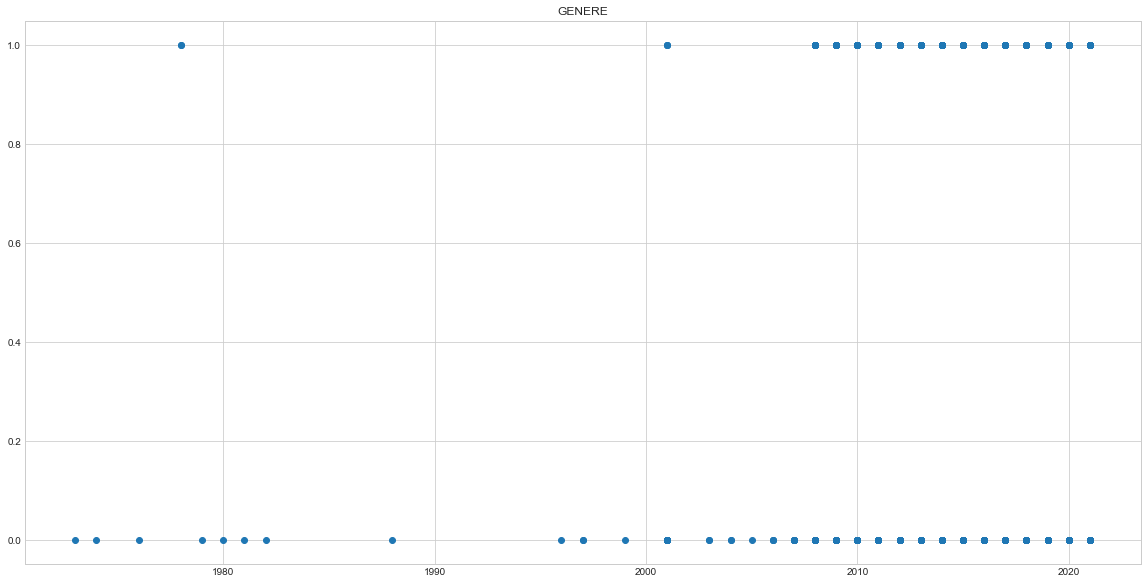

-945.0651937147895


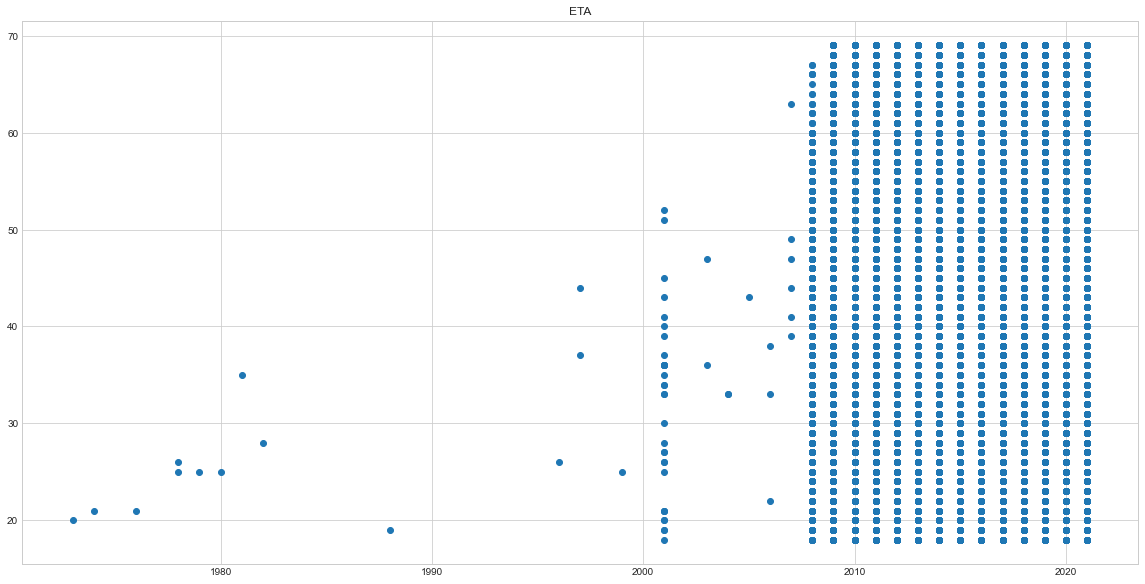

-891.3604645131851


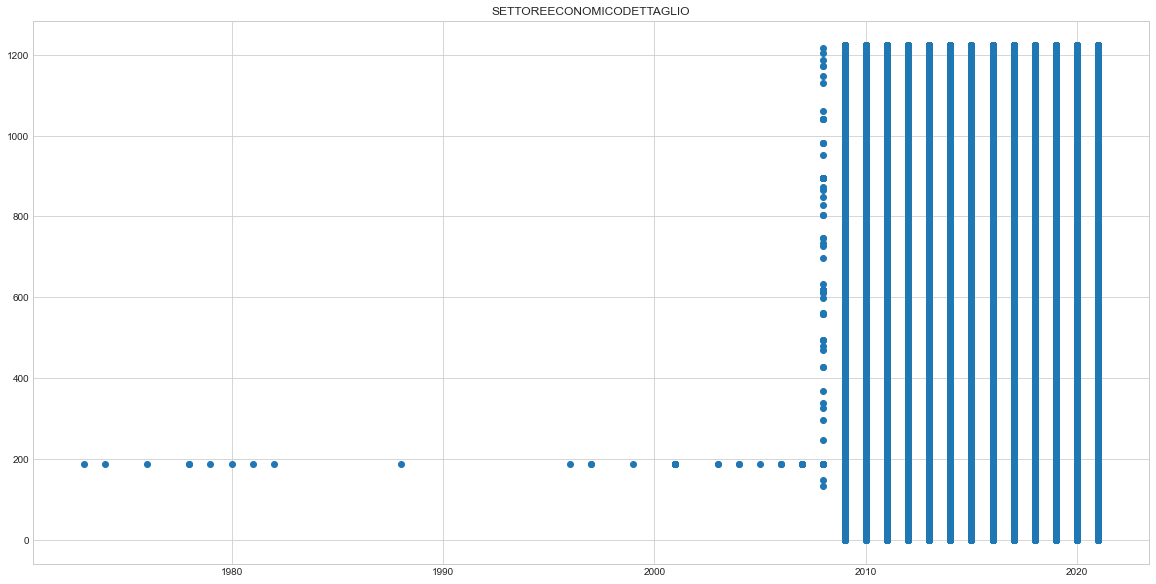

-273.7387482668863


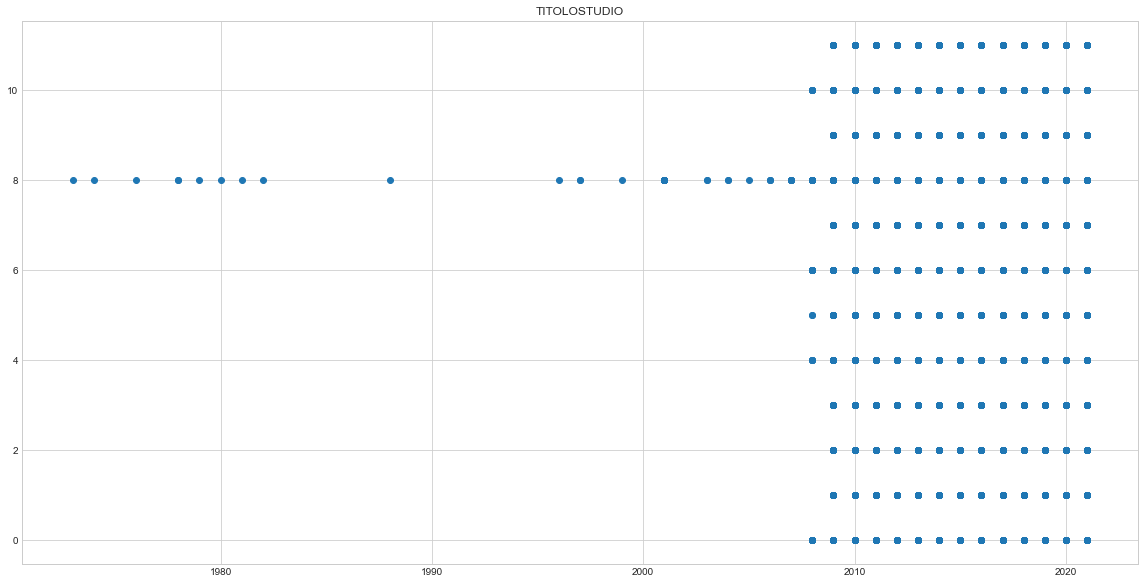

-369.29127534353523


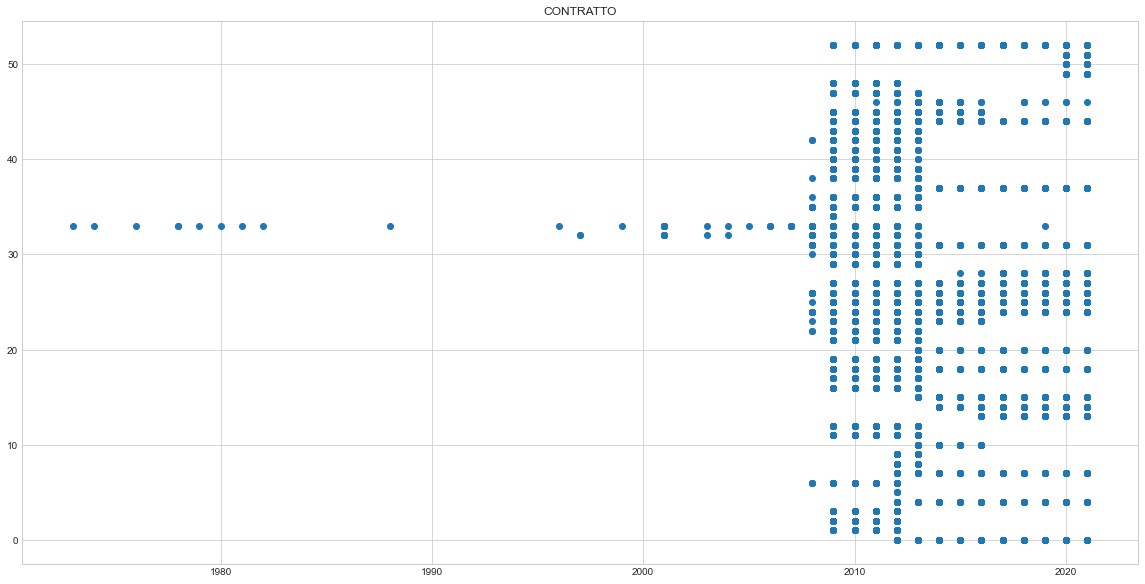

-39.97067531582572


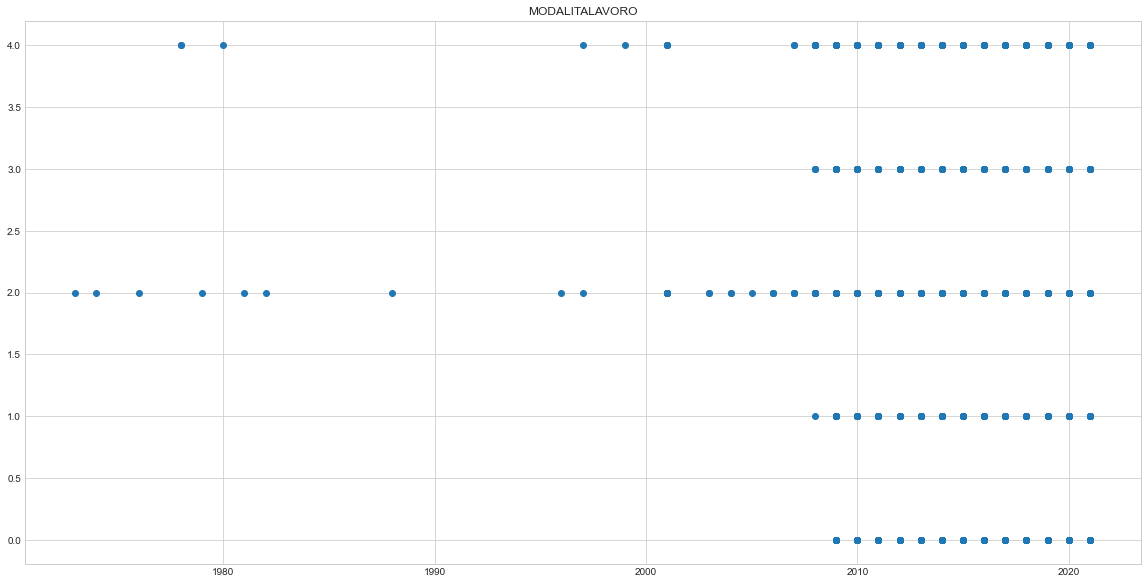

-2405.8953325121647


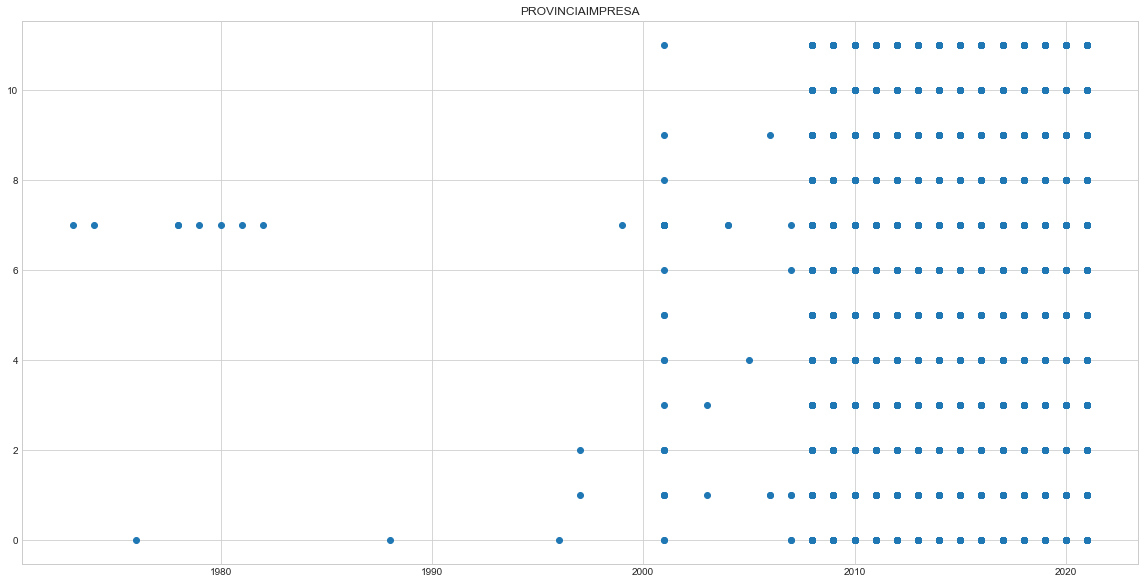

-240673.34654076525


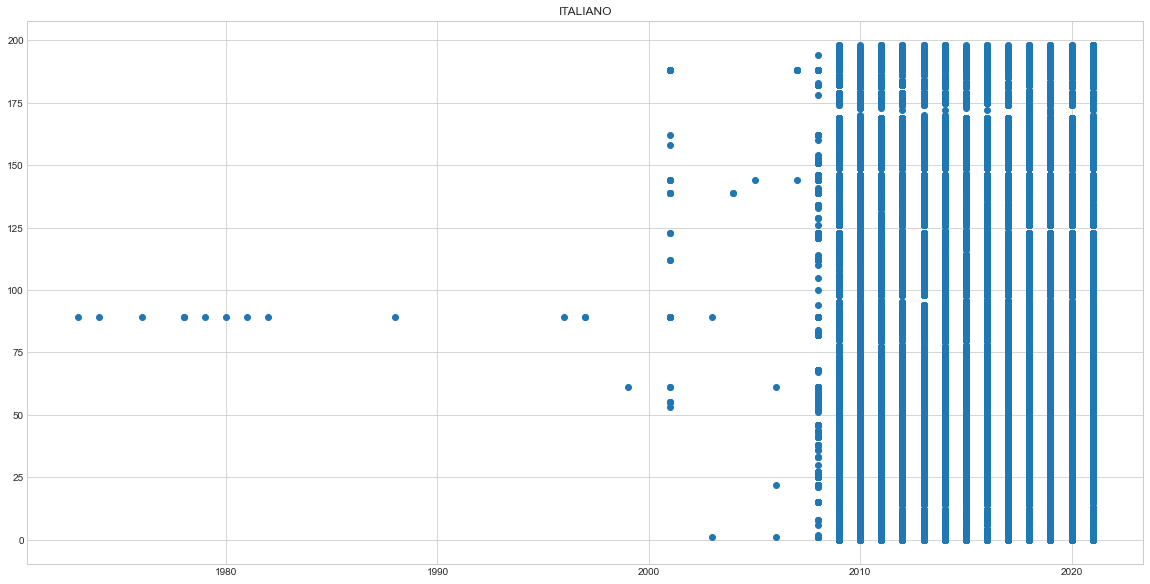

-36664.633327671334


In [87]:
def linearity(df, list_column):
    for i in list_column:
        X = df_copy['YEAR']
        Y = df[i]
        plt.scatter(X,Y)
        plt.title(i)
        plt.show()
        
        regressor_linear = LinearRegression().fit(X.array.reshape(-1, 1) ,Y)
        print(r2_score(regressor_linear.predict(X.array.reshape(-1, 1) ),Y))

list_1 = ['GENERE', 'ETA','SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO',
          'PROVINCIAIMPRESA', 'ITALIANO']

linearity(df_copy, list_1)

______

# __Fifth part__
### __Time Series Analysis__

Previously, we have analyzed 'Rapporti_di_lavoro_cessati' dataSet in terms of:
- __Globally__
- __Before Covid 19 pandemic__
- __During Covid 19 pandemic__

In the following paragraphs, we are going to view the trend of these time series. This analysis want to outlines:
 __Global Analysis__

In particular:
1. __View of boxPlot of month-wise(seasonal) ans year-wise(Trend)__
2. __View of Additive and Multiplicative Patterns__
3. __Stationarity test__

This chapter describes the Time Series of the global dataset analyzed before. In particular we have created two new subset between 2009 and 2021 year in order to clean the Time Series from null data.

In [88]:
global_Data_YEAR_Copy = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR']>2008)]
global_Data_YEAR_1 = global_Data_YEAR_Copy.groupby(['DATA']).YEAR.count()
global_Data_YEAR_2 = global_Data_YEAR_Copy.groupby(['YEAR']).MONTH.count()

global_Data_YEAR_1 = pd.DataFrame({'date': global_Data_YEAR_1.index,
                                 'value': global_Data_YEAR_1.values})

global_Data_YEAR_2 = pd.DataFrame({'date': global_Data_YEAR_2.index,
                                 'value': global_Data_YEAR_2.values})

global_Data_YEAR_1['year'] = [d.year for d in global_Data_YEAR_1.date]
global_Data_YEAR_1['month'] = [d.strftime('%b') for d in global_Data_YEAR_1.date]
years = global_Data_YEAR_1['year'].unique()

1. __BoxPlot of Month-wise(Seasonal) and Year-wise(trend)__

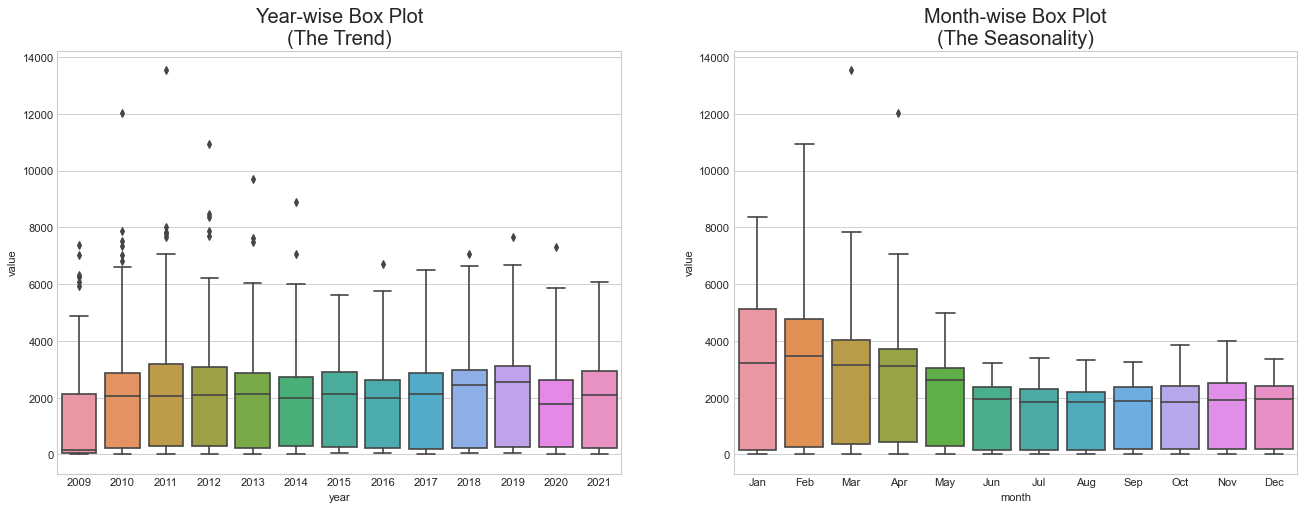

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_YEAR_1, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_YEAR_1, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

2. __Additive and moltiplicative patterns__

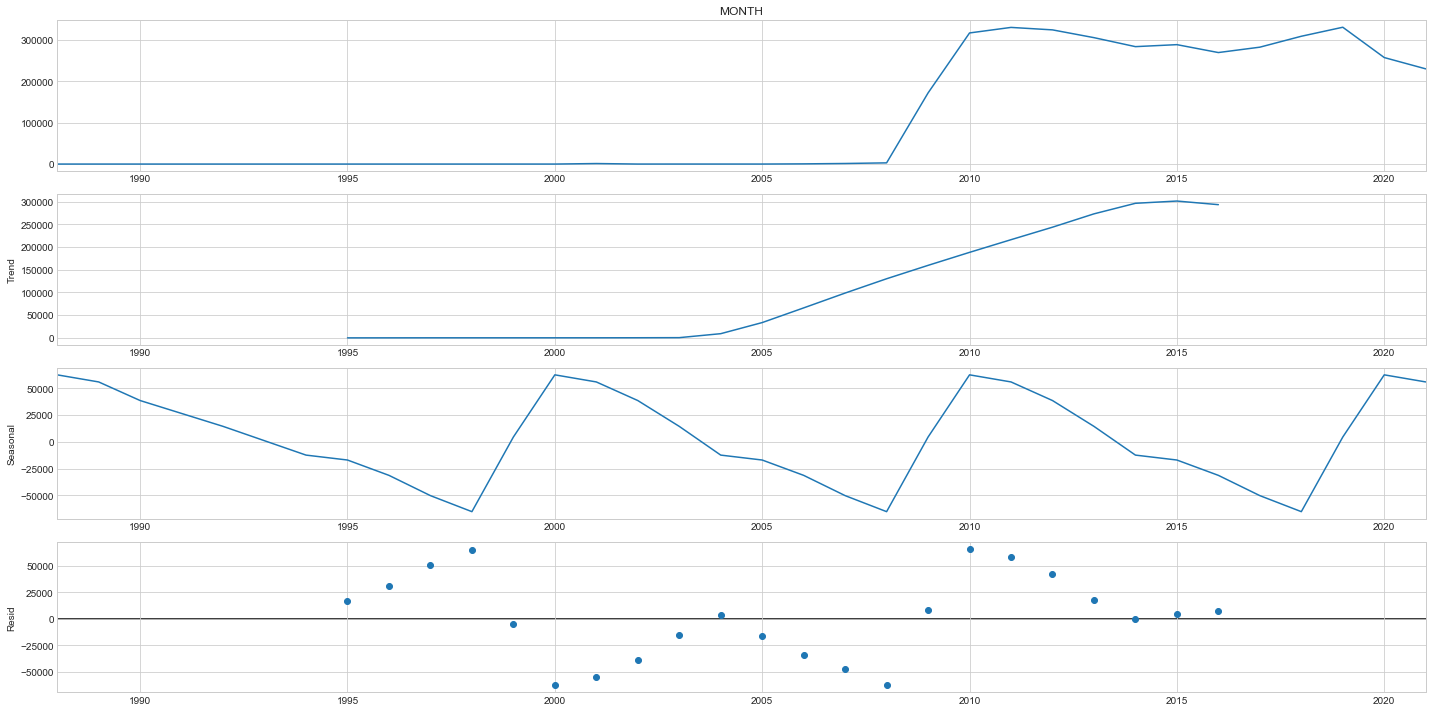

In [90]:
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(global_Data_YEARC, model="additive",period=10)
add = decomposed_add.plot()
plt.show()

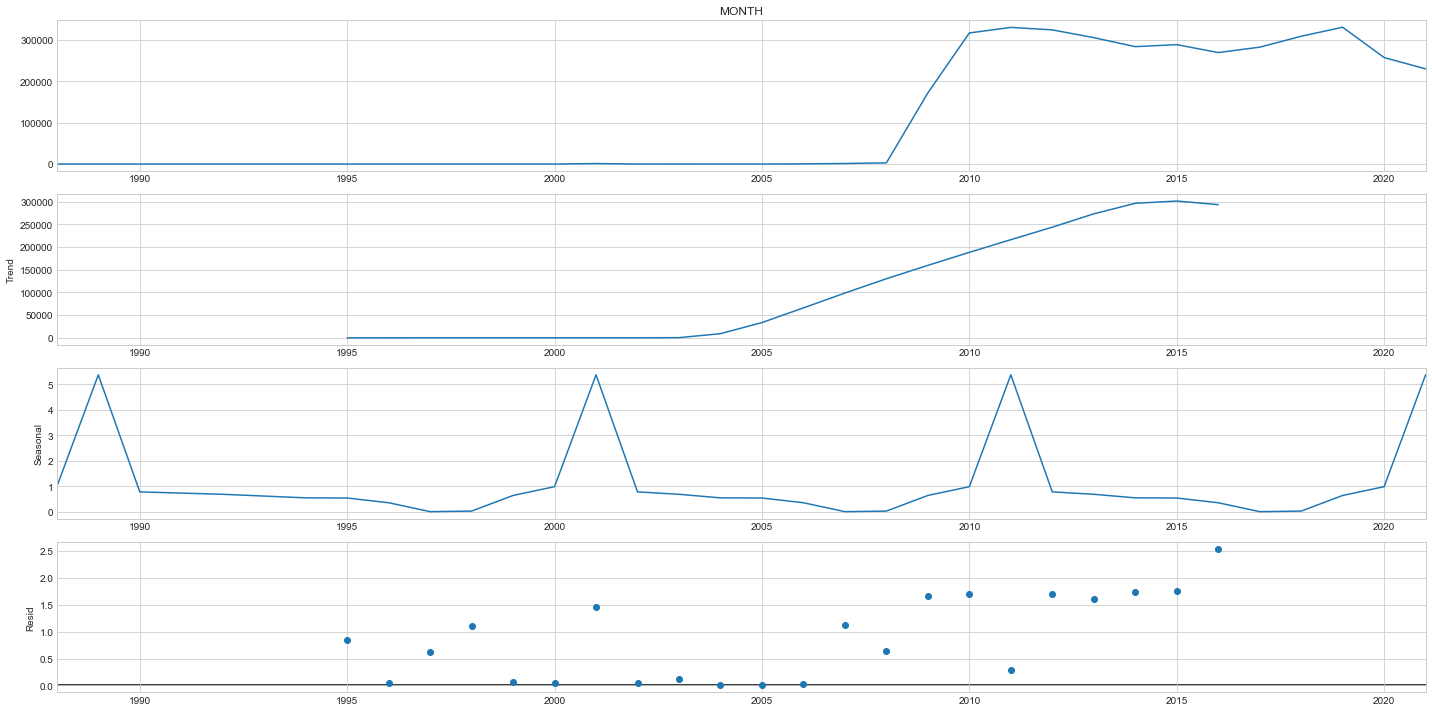

In [91]:
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(global_Data_YEARC, model="multiplicative",period=10)
add = decomposed_add.plot()
plt.show()

3. __Stationarity test__

In [92]:
results = adfuller(global_Data_YEARC.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -1.466814
p-value: 0.549860


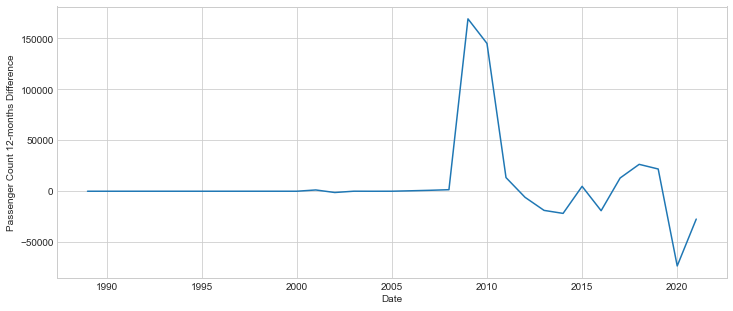

In [93]:
global_diff = global_Data_YEARC.diff().dropna()
plt.figure(figsize=(12,5))
ax1 = global_diff.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Passenger Count 12-months Difference")
plt.grid(True)
plt.show()

In [94]:
results = adfuller(global_diff.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -3.692573
p-value: 0.004219


### __Feature Engineering__

After manipulating data, cleaning null/ambiguous data and having a view of time series behaviour, now we are going to manipulated data in order to transform and adapt them to create the automatic learning model.   

This process is called Feature Engineering; it is important for the Machine Learning because some type of automatic learning don't support  token/String data but only number

Our goal is to identify in the dataSet the token/String data in order to transform them in to number type.

In [95]:
result_String = Rapporti_Lavoro_Cessati_DF.select_dtypes(include=['object', 'category'])

In [96]:
result_String.head(5)

,GENERE,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,M,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,F,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,F,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


### __Label encoder__

We used LabelEncoder to convert each class under specified feature to a numerical value.

In [97]:
df_Transform_End = Rapporti_Lavoro_Cessati_DF.copy()

In [98]:
class_Genere = preprocessing.LabelEncoder()
class_Genere.fit(df_Transform_End['GENERE'])
df_Transform_End['GENERE'] = class_Genere.transform(df_Transform_End['GENERE'])

class_SettoreEconomico = preprocessing.LabelEncoder()
class_SettoreEconomico.fit(df_Transform_End['SETTOREECONOMICODETTAGLIO'])
df_Transform_End['SETTOREECONOMICODETTAGLIO'] = class_SettoreEconomico.transform(df_Transform_End['SETTOREECONOMICODETTAGLIO'])

class_TitoloStudio = preprocessing.LabelEncoder()
class_TitoloStudio.fit(df_Transform_End['TITOLOSTUDIO'])
df_Transform_End['TITOLOSTUDIO'] = class_TitoloStudio.transform(df_Transform_End['TITOLOSTUDIO'])

class_Contratto = preprocessing.LabelEncoder()
class_Contratto.fit(df_Transform_End['CONTRATTO'])
df_Transform_End['CONTRATTO'] = class_Contratto.transform(df_Transform_End['CONTRATTO'])

class_ModalitaLavoro = preprocessing.LabelEncoder()
class_ModalitaLavoro.fit(df_Transform_End['MODALITALAVORO'])
df_Transform_End['MODALITALAVORO'] = class_ModalitaLavoro.transform(df_Transform_End['MODALITALAVORO'])

class_Provincia = preprocessing.LabelEncoder()
class_Provincia.fit(df_Transform_End['PROVINCIAIMPRESA'])
df_Transform_End['PROVINCIAIMPRESA'] = class_Provincia.transform(df_Transform_End['PROVINCIAIMPRESA'])

class_Italiano = preprocessing.LabelEncoder()
class_Italiano.fit(df_Transform_End['ITALIANO'])
df_Transform_End['ITALIANO'] = class_Italiano.transform(df_Transform_End['ITALIANO'])

df_Transform_End.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,1,20.0,883,0,8,4,0,88,2019-04-02,2019,4,2
1,0,28.0,530,0,8,4,0,88,2018-06-08,2018,6,8
2,0,20.0,530,0,8,4,0,88,2016-02-02,2016,2,2
3,1,59.0,817,6,25,4,0,88,2015-01-12,2015,1,12
4,1,61.0,817,6,25,4,0,88,2017-08-09,2017,8,9


In [99]:
df_Transform_End.dtypes

GENERE                                int32
ETA                                 float64
SETTOREECONOMICODETTAGLIO             int32
TITOLOSTUDIO                          int32
CONTRATTO                             int32
MODALITALAVORO                        int32
PROVINCIAIMPRESA                      int32
ITALIANO                              int32
DATA                         datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY                                   int64
dtype: object

### __Data Reduction__

After the previous analysis, we are going to  reduce our data because the effectivenes of most of learning algoritm comes from the discrimminatory and particular data.

#### __Linearity and not-Linearity dataset__

This paragraph want to find out if our dataSet is linear or not. 

We used the Square Error Method:
- If the square error will be high the dataset will not be linear
- If the square error will be lower and close to the zero this will be linear

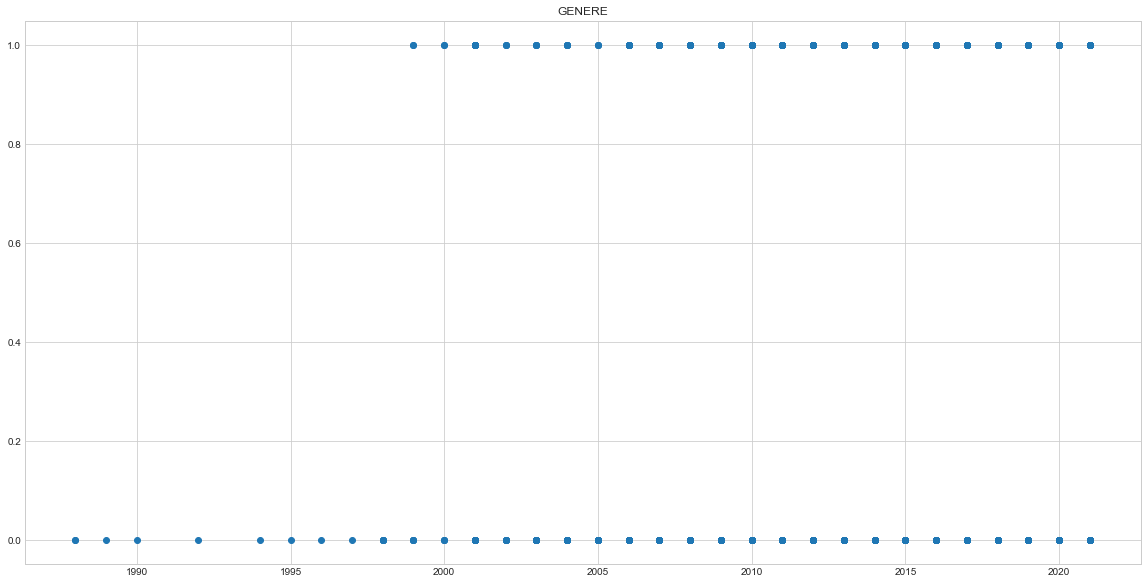

-24113.99754309971


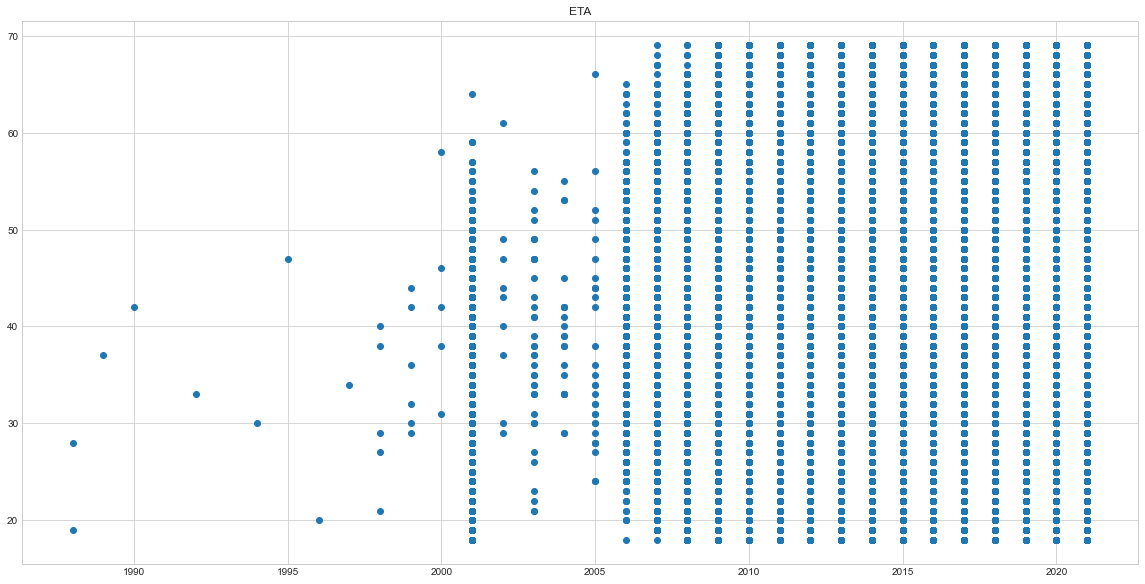

-136.5726257117335


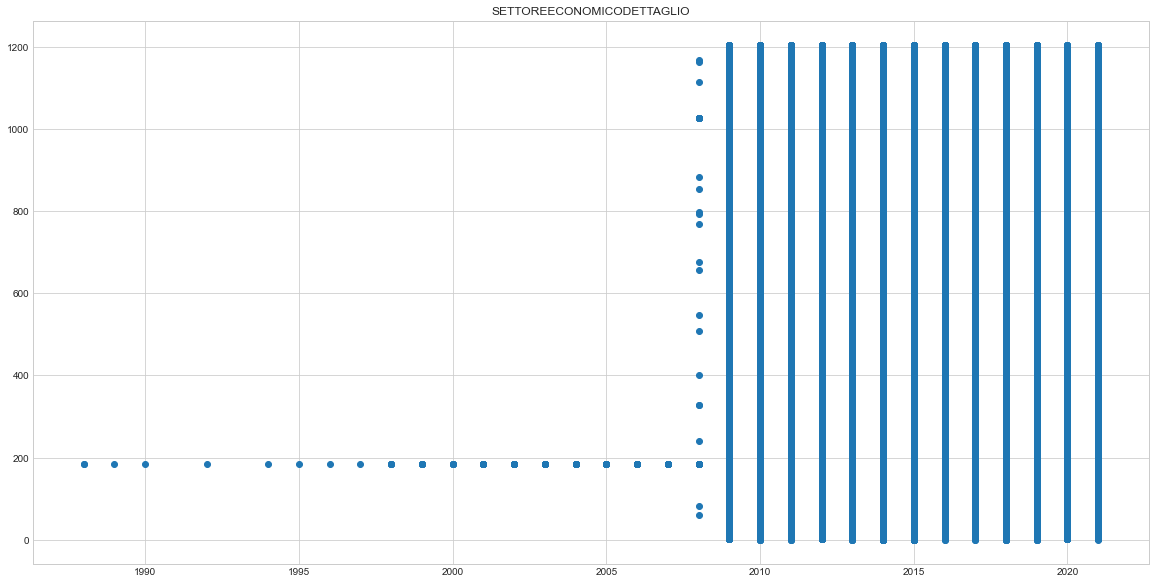

-317.9960119730867


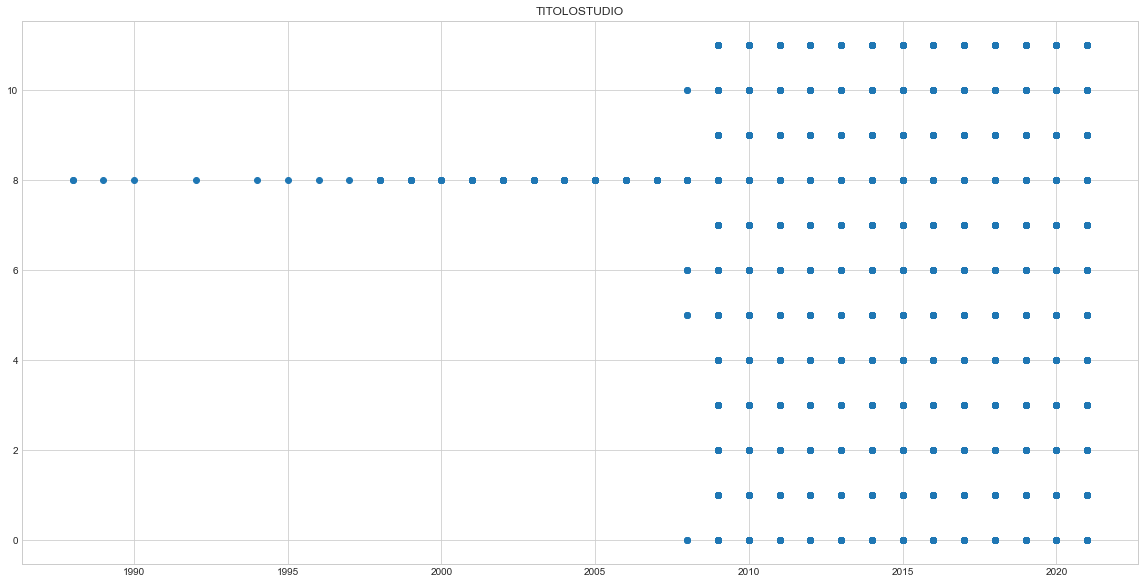

-88.34974740573897


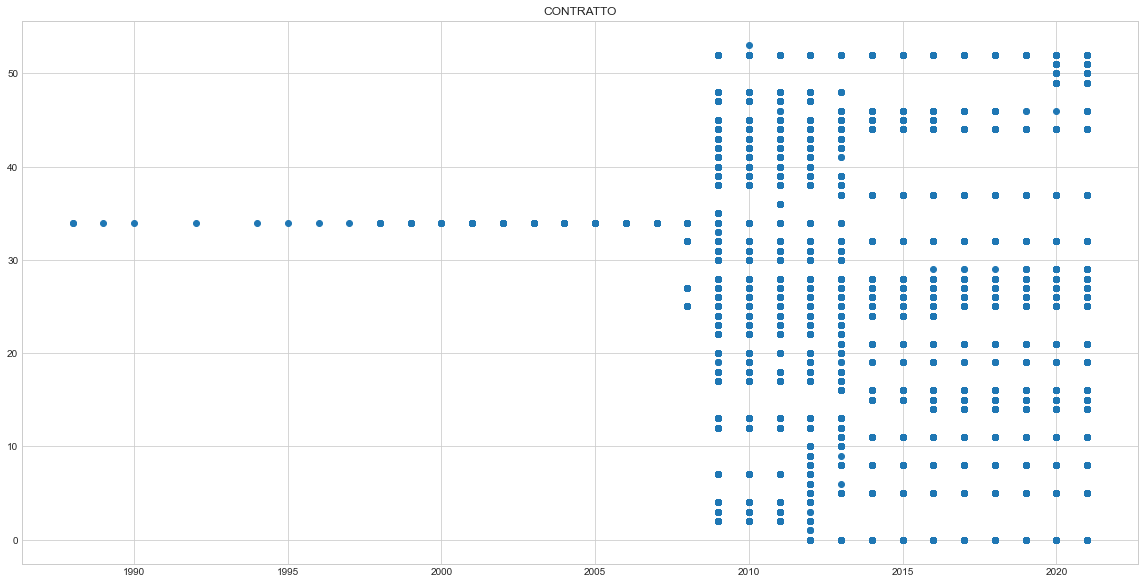

-136951.42785865886


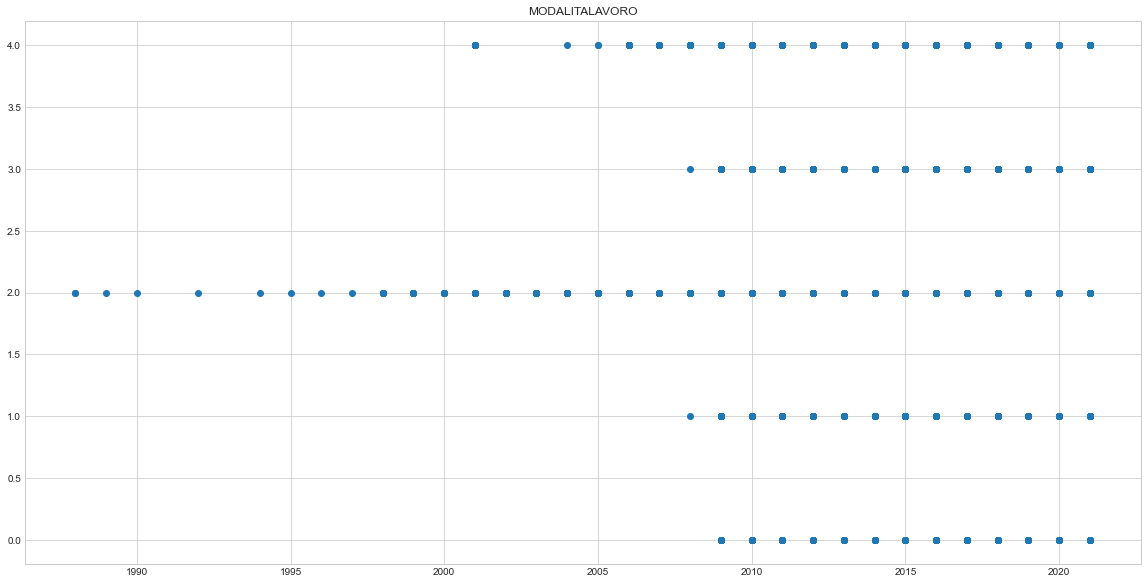

-817.7979126709464


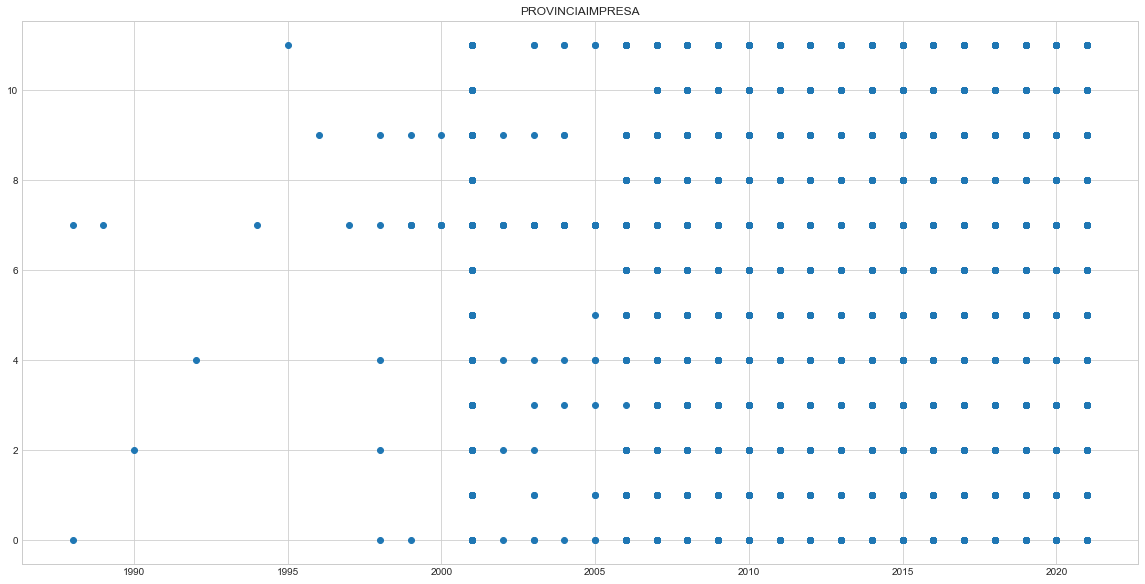

-31398.305513317504


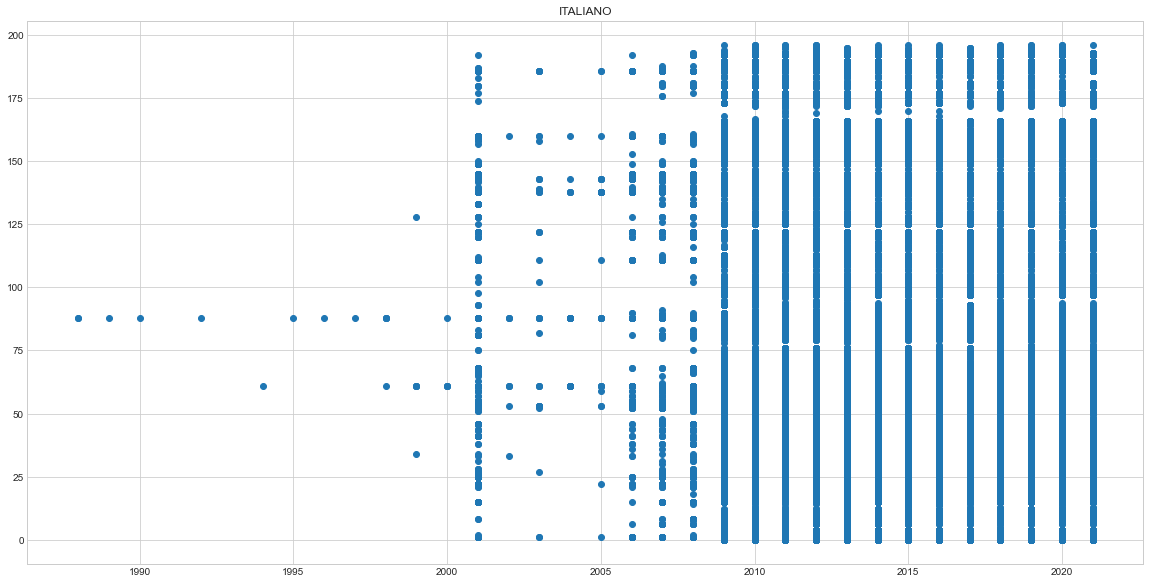

-31400.590853729755


In [100]:
def linearity(df, list_column):
    for i in list_column:
        X = df_Transform_End['YEAR']
        Y = df[i]
        plt.scatter(X,Y)
        plt.title(i)
        plt.show()
        
        regressor_linear = LinearRegression().fit(X.array.reshape(-1, 1) ,Y)
        print(r2_score(regressor_linear.predict(X.array.reshape(-1, 1) ),Y))

list_1 = ['GENERE', 'ETA','SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO',
          'PROVINCIAIMPRESA', 'ITALIANO']

linearity(df_Transform_End, list_1)

______

## Sixth part 

## AUTO-ARIMA

We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. Auto ARIMA model generates the optimal p, d, and q values which fits  the dataSet to provide better forecasting, where:

- __Auto-Regressive (p)__ is the Number of autoregressive terms.

- __Integrated (d)__ is the  Number of nonseasonal differences needed for stationarity.

- __Moving Average (q)__ is the Number of lagged forecast errors in the prediction equation.

In [101]:
df = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] >= 2009)]
df = df.groupby(['DATA']).YEAR.count()
df_1 = pd.DataFrame({'date': df.index,
                     'value': df.values})
df_1 = df_1.groupby(pd.Grouper(key='date', axis=0, freq='M', sort=True)).sum()
df_1.drop(df_1.loc[df_1['value']== 0].index, inplace=True)
df_1

,value
date,
2009-01-31,26604
2009-02-28,33627
2009-03-31,31209
2009-04-30,29069
2009-05-31,19803
...,...
2021-08-31,59807
2021-09-30,55507
2021-10-31,47692


<AxesSubplot:xlabel='date'>

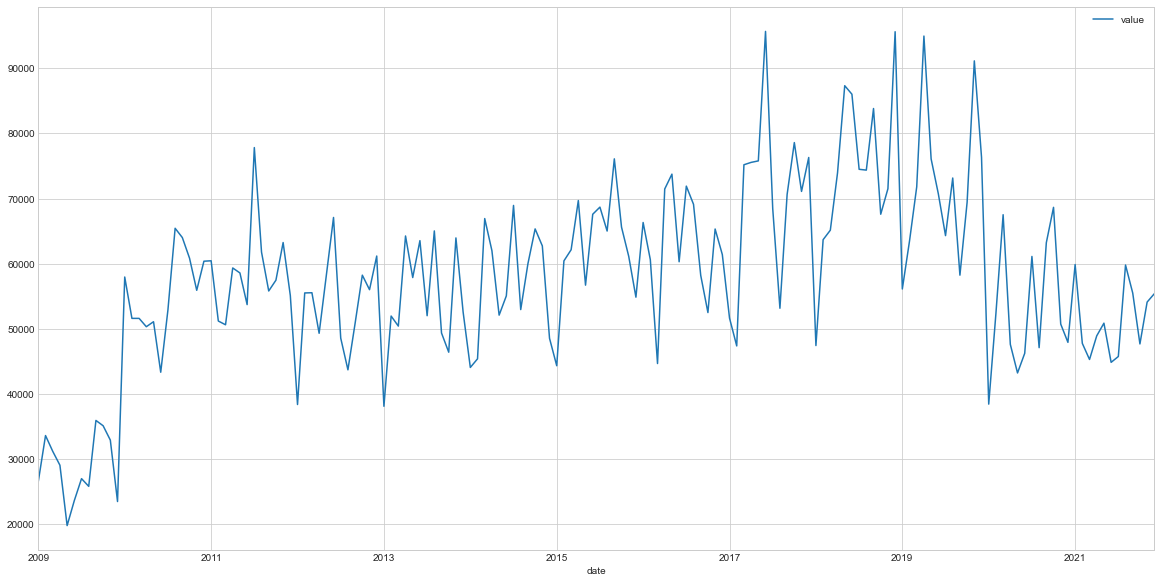

In [102]:
df_1.plot()

In [103]:
results = adfuller(df_1.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -3.058669
p-value: 0.029767


<Figure size 864x360 with 0 Axes>

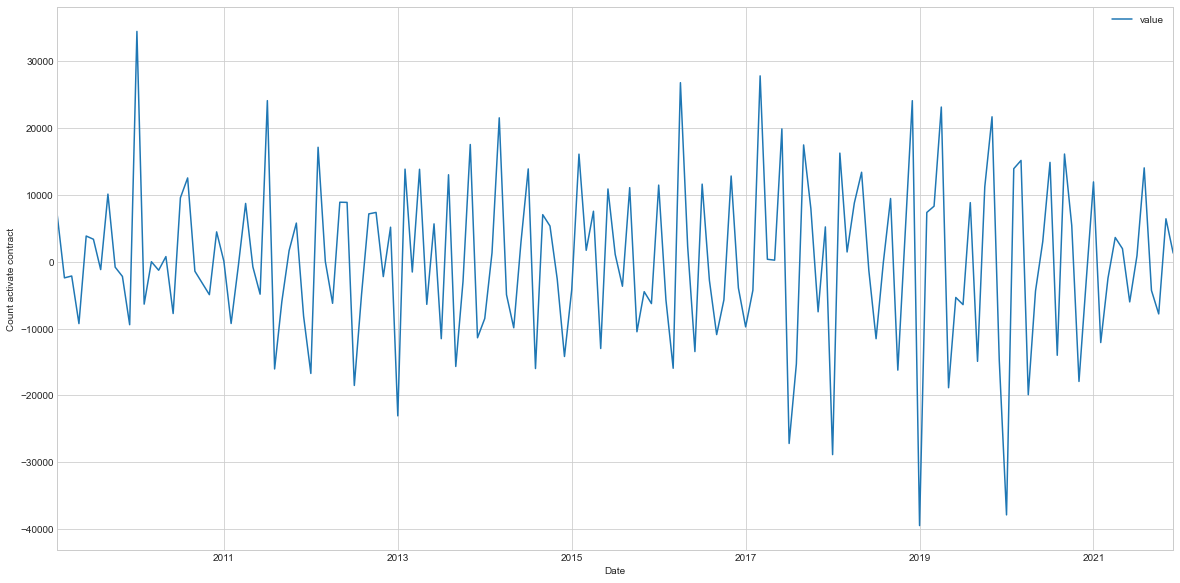

In [104]:
global_diff = df_1.diff().dropna()
plt.figure(figsize=(12,5))
ax1 = global_diff.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Count activate contract")
plt.grid(True)
plt.show()

In [105]:
results = adfuller(global_diff.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -6.697581
p-value: 0.000000


In [106]:
stepwise_model = auto_arima(df_1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3084.613, Time=1.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3210.953, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3160.991, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3102.924, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3142.011, Time=0.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3104.218, Time=0.80 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3104.216, Time=2.36 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3120.123, Time=0.55 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3104.940, Time=3.47 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3138.236, Time=0.18 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=3084.885, Time=0.32 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3110.524, Time=0.37 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3149.574, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3082.754, Time=1.29 sec
 ARIMA(0,1,2)(0,1,0

In [107]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  156
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1537.377
Date:                              Thu, 19 May 2022   AIC                           3082.754
Time:                                      22:57:12   BIC                           3094.605
Sample:                                           0   HQIC                          3087.570
                                              - 156                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5268      0.082     -6.444      0.000      -0.687      -0.367
ma.L2         -0.1849      0.085     -2.181      0.029      -0.351      -0.019
ma.S.L12      -0.8344      0.049    -17.100      0.000      -0.930      -0.739
sigma2      1.206e+08   3.49e-11   3.45e+18      0.000    1.21e+08    1.21e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.26   Prob(JB):                         0.92
Heteroskedasticity (H):               1.31   Skew:                            -0.08
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.46e+33. Standard errors may be unstable.
"""

####  __So how to interpret the plot diagnostics?__

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

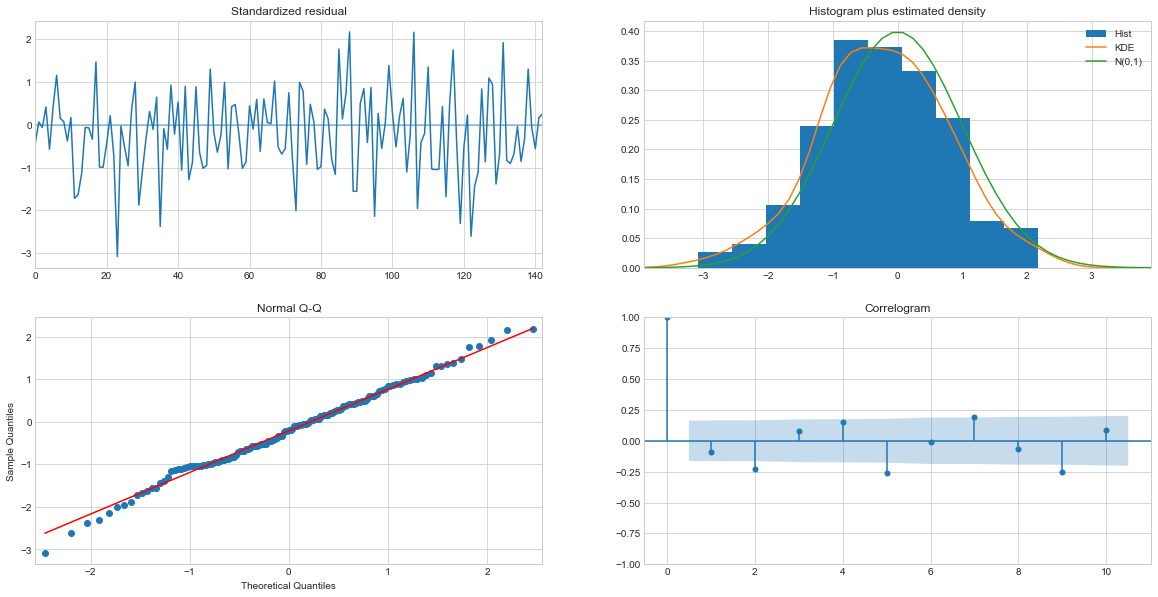

In [108]:
stepwise_model.plot_diagnostics()
plt.show()

In [109]:
train_size = 0.8
split_idx = round(len(df_1)* train_size)
split_idx

# Split
train = df_1.iloc[:split_idx]
test = df_1.iloc[split_idx:]

In [110]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [111]:
future_forecast, cf = stepwise_model.predict(n_periods=31, return_conf_int=True)

In [112]:
future_forecast

array([87485.43482903, 80664.27112746, 75636.10620064, 82256.55865456,
       77007.19096396, 78664.89881916, 85562.88363547, 64026.30955005,
       70702.79139538, 77407.04062628, 90641.66870073, 86110.21814574,
       92406.17965551, 84954.49187547, 79926.32694865, 86546.77940257,
       81297.41171197, 82955.11956717, 89853.10438348, 68316.53029806,
       74993.01214339, 81697.26137429, 94931.88944874, 90400.43889374,
       96696.40040352, 89244.71262348, 84216.54769666, 90837.00015058,
       85587.63245998, 87245.34031518, 94143.32513149])

In [113]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

<AxesSubplot:xlabel='date'>

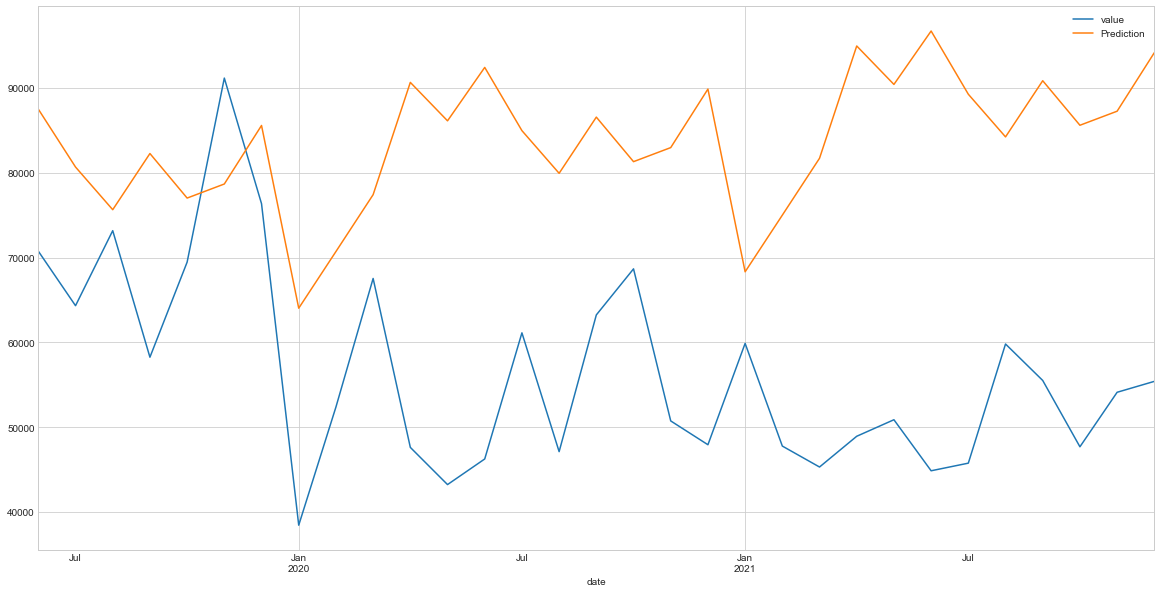

In [114]:
pd.concat([test,future_forecast],axis=1).plot()

In [115]:
future_forecast2 = future_forecast

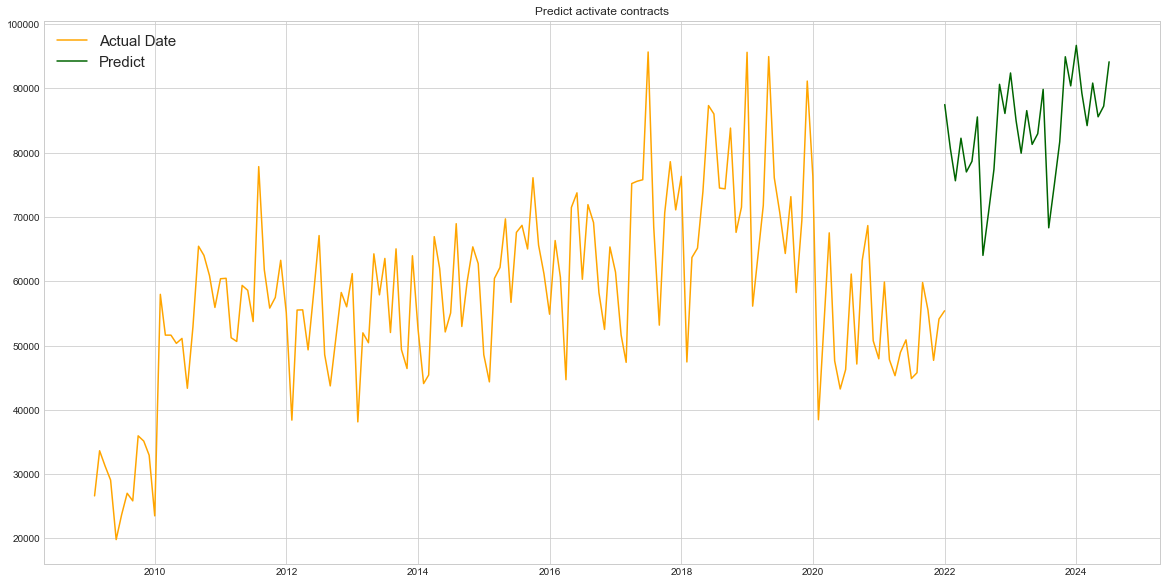

In [116]:
index_of_fc = pd.date_range(df_1.index[-1], periods = 31, freq='MS')

future_forecast_3 = future_forecast
future_forecast_3 = future_forecast_3.set_index(index_of_fc)

# Plot
plt.plot(df_1, color='orange', label='Actual Date')
plt.plot(future_forecast_3, color='darkgreen', label='Predict')
plt.legend(loc='upper left', fontsize=15)
plt.title("Predict activate contracts")
plt.show()

MAPE (Mean Absolute Percentage Error):
is a statistical measure to define the accuracy of a machine learning algorithm on a particular dataset.
MAPE can be considered as a loss function to define the error termed by the model evaluation. Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.

MAPE value should be as low as possible, it is an indicator that our model is making fewer errors.

In [117]:
mape = mean_absolute_percentage_error(test.value, future_forecast.Prediction)
print(mape)

0.548127874185763


RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.
Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.
By this, we can clearly judge the efficiency of the model

In [118]:
MSE = mean_squared_error(test, future_forecast)
RMSE = math.sqrt(MSE)
print('The mean square error is: ', MSE)
print('The Root Mean Square error is: ', RMSE)

The mean square error is:  959543859.4801633
The Root Mean Square error is:  30976.504959084123


## Seventh part

## AUTO-ARIMA

We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. Auto ARIMA model generates the optimal p, d, and q values which fits  the dataSet to provide better forecasting, where:

- __Auto-Regressive (p)__ is the Number of autoregressive terms.

- __Integrated (d)__ is the  Number of nonseasonal differences needed for stationarity.

- __Moving Average (q)__ is the Number of lagged forecast errors in the prediction equation.

In [119]:
df = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] >= 2009)]
df = df.groupby(['DATA']).YEAR.count()
df_1 = pd.DataFrame({'date': df.index,
                     'value': df.values})
df_1 = df_1.groupby(pd.Grouper(key='date', axis=0, freq='M', sort=True)).sum()
df_1.drop(df_1.loc[df_1['value']== 0].index, inplace=True)
df_1

,value
date,
2009-01-31,26529
2009-02-28,24994
2009-03-31,20847
2009-04-30,15387
2009-05-31,10607
...,...
2021-08-31,15893
2021-09-30,15964
2021-10-31,13271


<AxesSubplot:xlabel='date'>

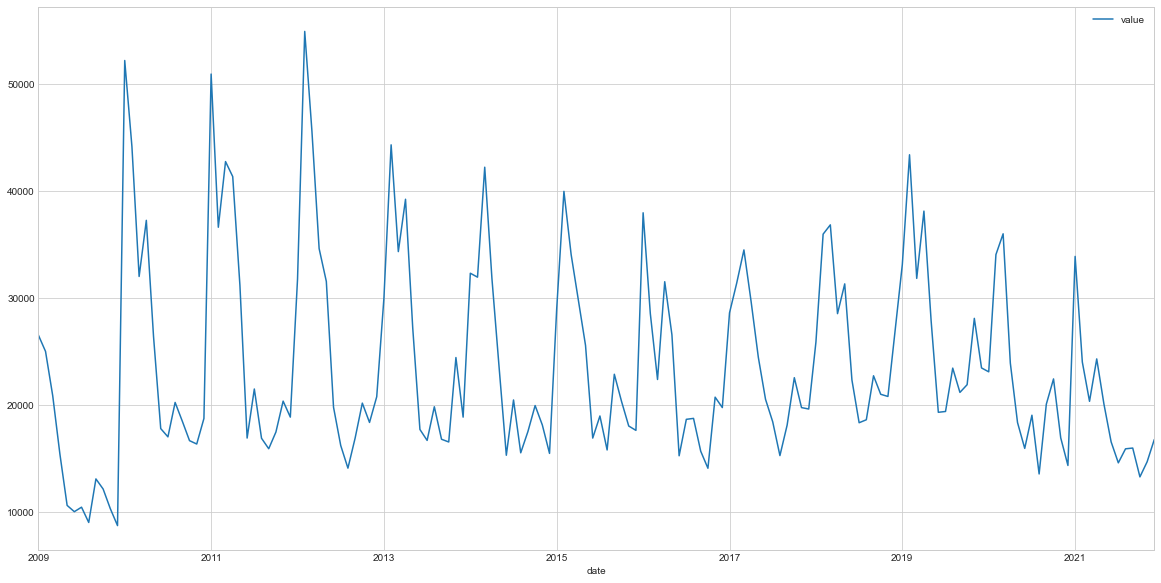

In [120]:
df_1.plot()

In [121]:
results = adfuller(df_1.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -1.177953
p-value: 0.683007


<Figure size 864x360 with 0 Axes>

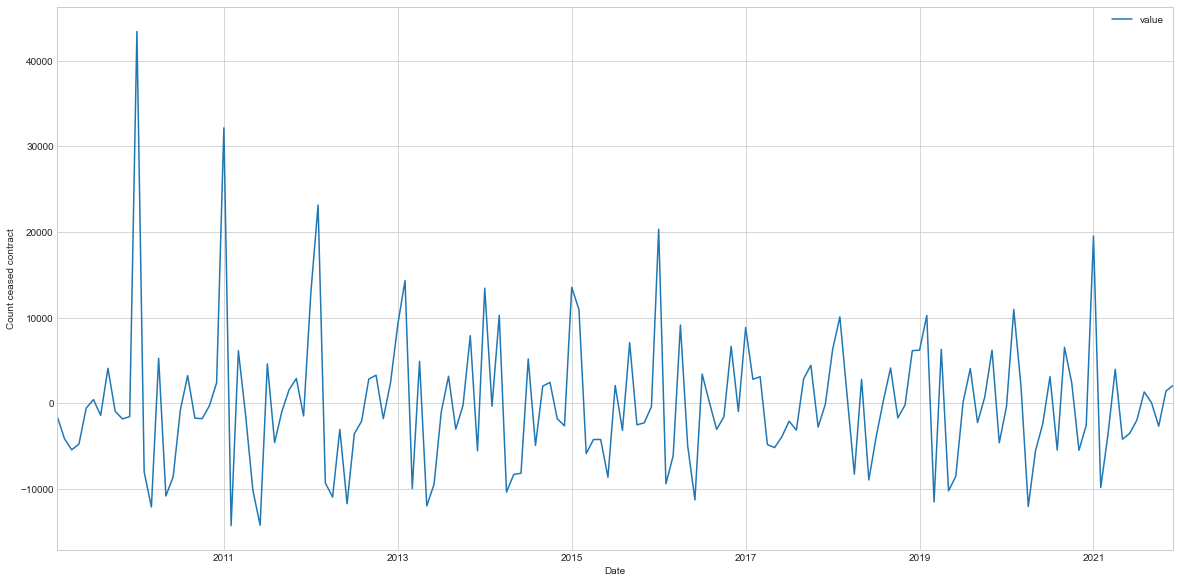

In [122]:
global_diff = df_1.diff().dropna()
plt.figure(figsize=(12,5))
ax1 = global_diff.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Count ceased contract")
plt.grid(True)
plt.show()

In [123]:
results = adfuller(global_diff.values)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -4.769068
p-value: 0.000062


In [124]:
stepwise_model = auto_arima(df_1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2876.535, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3000.457, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2943.233, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2876.274, Time=0.28 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2911.573, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2877.366, Time=0.38 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2877.250, Time=0.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2892.912, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2872.026, Time=1.18 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=2912.088, Time=0.08 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=2890.612, Time=0.47 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=2872.229, Time=1.73 sec
 ARIMA(0,1,2)(1,1,0)[12]     

In [125]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  156
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1430.839
Date:                              Thu, 19 May 2022   AIC                           2871.678
Time:                                      22:57:41   BIC                           2886.492
Sample:                                           0   HQIC                          2877.698
                                              - 156                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6455      0.060    -10.671      0.000      -0.764      -0.527
ma.L2         -0.1581      0.104     -1.524      0.128      -0.361       0.045
ma.L3          0.1016      0.096      1.060      0.289      -0.086       0.290
ma.S.L12      -0.7220      0.060    -12.061      0.000      -0.839      -0.605
sigma2      2.769e+07   4.63e-10   5.98e+16      0.000    2.77e+07    2.77e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.34   Prob(JB):                         0.03
Heteroskedasticity (H):               0.58   Skew:                            -0.17
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+33. Standard errors may be unstable.
"""

####  __So how to interpret the plot diagnostics?__

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

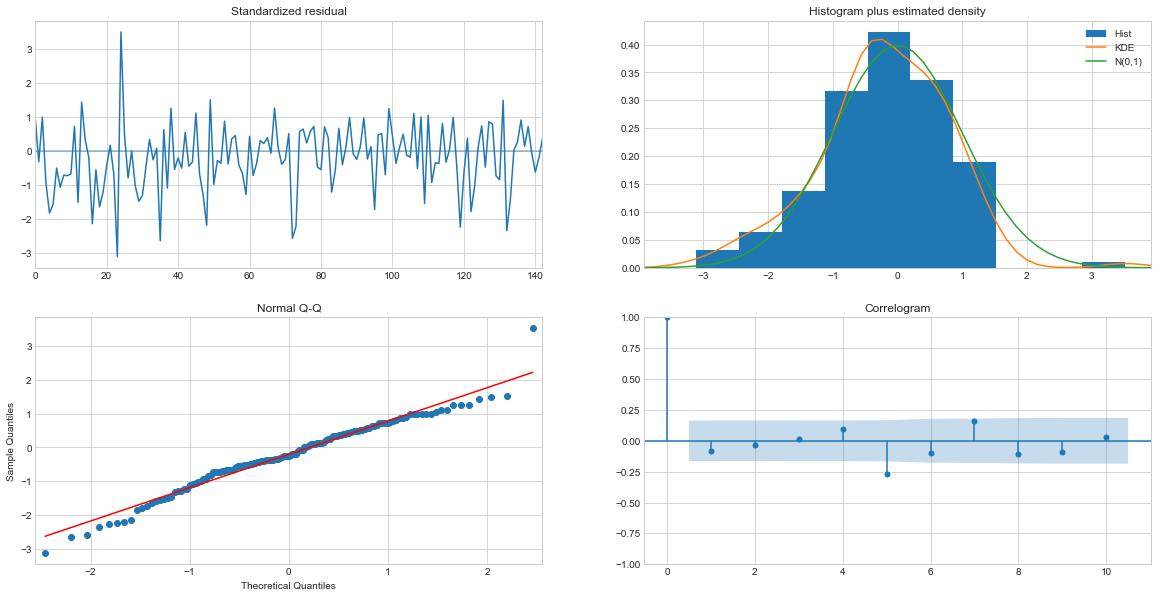

In [126]:
stepwise_model.plot_diagnostics()
plt.show()

In [127]:
train_size = 0.8
split_idx = round(len(df_1)* train_size)
split_idx

# Split
train = df_1.iloc[:split_idx]
test = df_1.iloc[split_idx:]

In [128]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [129]:
future_forecast, cf = stepwise_model.predict(n_periods=31, return_conf_int=True)

In [130]:
future_forecast

array([22284.44164029, 22109.54958586, 20443.21315414, 22976.88820883,
       23081.7176699 , 23246.79108652, 25212.21064194, 34221.97498283,
       41224.87215057, 36475.8696303 , 36472.46478063, 31003.31232394,
       23908.19322483, 23123.03235777, 21768.61204491, 24302.2870996 ,
       24407.11656067, 24572.18997729, 26537.60953271, 35547.3738736 ,
       42550.27104134, 37801.26852107, 37797.8636714 , 32328.71121471,
       25233.5921156 , 24448.43124854, 23094.01093568, 25627.68599037,
       25732.51545144, 25897.58886806, 27863.00842348])

In [131]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

<AxesSubplot:xlabel='date'>

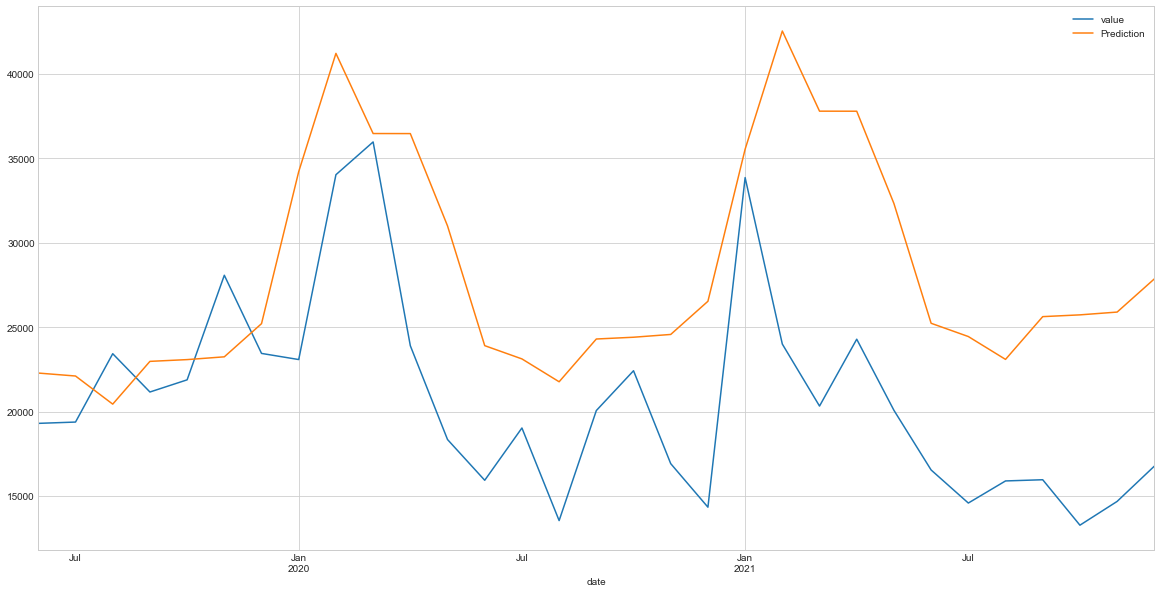

In [132]:
pd.concat([test,future_forecast],axis=1).plot()

In [133]:
future_forecast2 = future_forecast

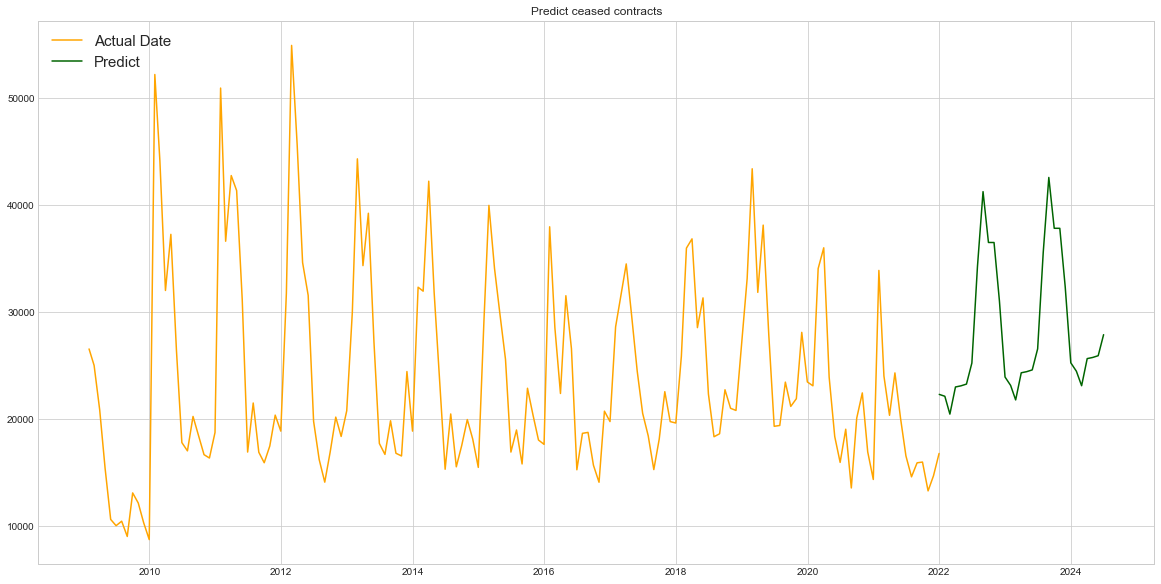

In [134]:
index_of_fc = pd.date_range(df_1.index[-1], periods = 31, freq='MS')
future_forecast_3 = future_forecast
future_forecast_3 = future_forecast_3.set_index(index_of_fc)

# Plot
plt.plot(df_1, color='orange', label='Actual Date')
plt.plot(future_forecast_3, color='darkgreen', label='Predict')
plt.legend(loc='upper left', fontsize=15)
plt.title("Predict ceased contracts")
plt.show()

MAPE (Mean Absolute Percentage Error):
is a statistical measure to define the accuracy of a machine learning algorithm on a particular dataset.
MAPE can be considered as a loss function to define the error termed by the model evaluation. Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.

MAPE value should be as low as possible, it is an indicator that our model is making fewer errors.

In [135]:
mape = mean_absolute_percentage_error(test.value, future_forecast.Prediction)
print(mape)

0.4236560455973851


RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.
Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.
By this, we can clearly judge the efficiency of the model

In [136]:
MSE = mean_squared_error(test, future_forecast)
RMSE = math.sqrt(MSE)
print('The mean square error is: ', MSE)
print('The Root Mean Square error is: ', RMSE)

The mean square error is:  84999891.23040934
The Root Mean Square error is:  9219.538558431725
